In [0]:
import random
import pandas as pd
import numpy as np
import sklearn
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.utils import shuffle

In [0]:
missing="Unknown"
training_data=pd.read_csv("Train_unknown_updated.csv",na_values = missing)
#test_data=pd.read_csv("test_portfolio_1.csv")

In [0]:
training_data.head(5)

,PolicyNo,Policy_Company,Policy_Installment_Term,Policy_Billing_Code,Policy_Method_Of_Payment,Policy_Reinstatement_Fee_Indicator,Policy_Zip_Code_Garaging_Location,Vehicle_Territory,Vehicle_Make_Year,Vehicle_Make_Description,Vehicle_Make_Description 1,Vehicle_Make_Description 2,Vehicle_Performance,Vehicle_New_Cost_Amount,Vehicle_Symbol,Vehicle_Number_Of_Drivers_Assigned,Vehicle_Usage,Vehicle_Miles_To_Work,Vehicle_Days_Per_Week_Driven,Vehicle_Annual_Miles,Vehicle_Anti_Theft_Device,Vehicle_Passive_Restraint,Vehicle_Age_In_Years,Vehicle_Med_Pay_Limit,Vehicle_Bodily_Injury_Limit,Vehicle_Physical_Damage_Limit,Vehicle_Comprehensive_Coverage_Indicator,Vehicle_Comprehensive_Coverage_Limit,Vehicle_Collision_Coverage_Indicator,Vehicle_Collision_Coverage_Deductible,Driver_Total,Driver_Total_Male,Driver_Total_Female,Driver_Total_Single,Driver_Total_Married,Driver_Total_Related_To_Insured_Self,Driver_Total_Related_To_Insured_Spouse,Driver_Total_Related_To_Insured_Child,Driver_Total_Licensed_In_State,Driver_Minimum_Age,Driver_Maximum_Age,Driver_Total_Teenager_Age_15_19,Driver_Total_College_Ages_20_23,Driver_Total_Young_Adult_Ages_24_29,Driver_Total_Low_Middle_Adult_Ages_30_39,Driver_Total_Middle_Adult_Ages_40_49,Driver_Total_Adult_Ages_50_64,Driver_Total_Senior_Ages_65_69,Driver_Total_Upper_Senior_Ages_70_plus,Vehicle_Youthful_Driver_Indicator,Vehicle_Youthful_Driver_Training_Code,Vehicle_Youthful_Good_Student_Code,Vehicle_Driver_Points,Vehicle_Safe_Driver_Discount_Indicator,EEA_Liability_Coverage_Only_Indicator,EEA_Multi_Auto_Policies_Indicator,EEA_Policy_Zip_Code_3,EEA_Policy_Tenure,EEA_Agency_Type,EEA_Packaged_Policy_Indicator,EEA_Full_Coverage_Indicator,EEA_Prior_Bodily_Injury_Limit,EEA_PolicyYear,SYS_Renewed,SYS_New_Business,Annual_Premium,Claim_Count,Loss_Amount,Frequency,Severity,Loss_Ratio
0,164532941,Standard,6,Direct Billed to Insured,Pre-paid,N,43046.0,35,2004,BUIK LESABRE LI,BUIK,LESABRE LI,Standard,-1,11,1,Farm,-1,5,NaN,Not Applicable,Y,3,1000,250-500,100000,N,-1,Y,500,1,0,1,0,0,1,0,0,1,75,75,0,0,0,0,0,0,0,1,N,Not Applicable,Not Eligible for Good Student Credit,0,Y,N,N,430.0,22.7,Standard,N,Y,100-400,2006,Y,N,320.12,0,0.0,0.0,0.0,0.0
1,164533241,Standard,6,Direct Billed to Insured,Pre-paid,N,NaN,35,1980,CADILLAC 4-DOOR,CADILLAC,4-DOOR,Standard,-1,11,1,Farm,-1,5,NaN,Not Applicable,N,9,2000,100-300,50000,N,-1,Y,50,1,0,1,0,1,0,0,0,1,71,71,0,0,0,0,0,0,0,1,N,Not Applicable,Not Eligible for Good Student Credit,0,Y,N,N,NaN,47.1,Preferred,N,Y,100-200,2006,Y,N,259.70,0,0.0,0.0,0.0,0.0
2,164534633,Standard,6,Direct Billed to Insured,Pre-paid,N,43555.0,17,2005,PONT MONTANA SV,PONTIAC,MONTANA SV,Standard,-1,10,1,Pleasure,-1,5,NaN,Passive Disabling-Vehicle Recovery,Y,2,50000,250-500,100000,N,-1,Y,100,1,1,0,0,1,1,0,0,1,80,80,0,0,0,0,0,0,0,1,N,Not Applicable,Not Eligible for Good Student Credit,0,Y,N,N,435.0,47.2,Non-standard,N,Y,100-400,2006,Y,N,613.74,0,0.0,0.0,0.0,0.0
3,164534839,Standard,6,Direct Billed to Insured,Pre-paid,N,43561.0,17,2005,MERC GRAND MARQ,MERC,GRAND MARQ,Standard,-1,12,1,Pleasure,-1,5,NaN,Passive Disabling-Vehicle Recovery,Y,2,5000,50-100,35000,N,-1,Y,250,1,1,0,0,1,1,0,0,1,74,74,0,0,0,0,0,0,0,1,N,Not Applicable,Not Eligible for Good Student Credit,0,Y,N,Y,435.0,46.7,Non-standard,Y,Y,40-100,2006,Y,N,541.66,0,0.0,0.0,0.0,0.0
4,164534840,Standard,6,Direct Billed to Insured,Pre-paid,N,43561.0,17,2005,MERC GRAND MARQ,MERC,GRAND MARQ,Standard,-1,12,1,Pleasure,-1,5,NaN,Passive Disabling-Vehicle Recovery,Y,2,5000,50-100,35000,N,-1,Y,250,1,1,0,0,1,1,0,0,1,75,75,0,0,0,0,0,0,0,1,N,Not Applicable,Not Eligible for Good Student Credit,0,Y,N,Y,435.0,47.2,Non-standard,Y,Y,40-100,2006,Y,N,541.66,0,0.0,0.0,0.0,0.0


In [0]:
# training_data_copy=training_data.drop(['PolicyNo','Vehicle_New_Cost_Amount','Vehicle_Annual_Miles','Vehicle_Make_Description','Vehicle_Make_Description 2','Policy_Zip_Code_Garaging_Location','EEA_PolicyYear'], axis=1)

In [0]:
# training_data_copy=training_data_copy.drop(['Claim_Count','Frequency','Severity','Loss_Ratio'], axis=1)

In [0]:
training_data_copy=training_data.drop(['PolicyNo','Policy_Zip_Code_Garaging_Location','Vehicle_Make_Description','Vehicle_Make_Description 2','EEA_PolicyYear','Frequency','Severity','Loss_Ratio'], axis=1)

In [0]:
# training_data_copy.info()

In [0]:
#Find which columns have null values
#count=0
#for i in training_data.isnull().sum():
#  count+=1
#  print(training_data.columns[count],":",i)

In [0]:
training_data_copy['EEA_Policy_Zip_Code_first']=training_data_copy.apply(lambda _: '', axis=1)
training_data_copy['EEA_Policy_Zip_Code_first_two']=training_data_copy.apply(lambda _: '', axis=1)

In [0]:
import math
i=0
for record in training_data_copy['EEA_Policy_Zip_Code_3']:
  if not math.isnan(record):
    training_data_copy['EEA_Policy_Zip_Code_first'][i] = int(record/100)
  else:
    training_data_copy['EEA_Policy_Zip_Code_first'][i] = np.NaN
  i+=1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [0]:
# training_data_copy.info()

In [0]:
import math
i=0
for record in training_data_copy['EEA_Policy_Zip_Code_3']:
  if not math.isnan(record):
    training_data_copy['EEA_Policy_Zip_Code_first_two'][i] = int(record/10)
  else:
    training_data_copy['EEA_Policy_Zip_Code_first_two'][i] = np.NaN
  i+=1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [0]:
training_data_copy=training_data_copy[['Policy_Company',
 'Policy_Installment_Term',
 'Policy_Billing_Code',
 'Policy_Method_Of_Payment',
 'Policy_Reinstatement_Fee_Indicator',
 'Vehicle_Territory',
 'Vehicle_Make_Year',
 'Vehicle_Make_Description 1',
 'Vehicle_Performance',
 'Vehicle_New_Cost_Amount',
 'Vehicle_Symbol',
 'Vehicle_Number_Of_Drivers_Assigned',
 'Vehicle_Usage',
 'Vehicle_Miles_To_Work',
 'Vehicle_Days_Per_Week_Driven',
 'Vehicle_Annual_Miles',
 'Vehicle_Anti_Theft_Device',
 'Vehicle_Passive_Restraint',
 'Vehicle_Age_In_Years',
 'Vehicle_Med_Pay_Limit',
 'Vehicle_Bodily_Injury_Limit',
 'Vehicle_Physical_Damage_Limit',
 'Vehicle_Comprehensive_Coverage_Indicator',
 'Vehicle_Comprehensive_Coverage_Limit',
 'Vehicle_Collision_Coverage_Indicator',
 'Vehicle_Collision_Coverage_Deductible',
 'Driver_Total',
 'Driver_Total_Male',
 'Driver_Total_Female',
 'Driver_Total_Single',
 'Driver_Total_Married',
 'Driver_Total_Related_To_Insured_Self',
 'Driver_Total_Related_To_Insured_Spouse',
 'Driver_Total_Related_To_Insured_Child',
 'Driver_Total_Licensed_In_State',
 'Driver_Minimum_Age',
 'Driver_Maximum_Age',
 'Driver_Total_Teenager_Age_15_19',
 'Driver_Total_College_Ages_20_23',
 'Driver_Total_Young_Adult_Ages_24_29',
 'Driver_Total_Low_Middle_Adult_Ages_30_39',
 'Driver_Total_Middle_Adult_Ages_40_49',
 'Driver_Total_Adult_Ages_50_64',
 'Driver_Total_Senior_Ages_65_69',
 'Driver_Total_Upper_Senior_Ages_70_plus',
 'Vehicle_Youthful_Driver_Indicator',
 'Vehicle_Youthful_Driver_Training_Code',
 'Vehicle_Youthful_Good_Student_Code',
 'Vehicle_Driver_Points',
 'Vehicle_Safe_Driver_Discount_Indicator',
 'EEA_Liability_Coverage_Only_Indicator',
 'EEA_Multi_Auto_Policies_Indicator',
 'EEA_Policy_Zip_Code_3',
 'EEA_Policy_Zip_Code_first_two',
 'EEA_Policy_Zip_Code_first',
 'EEA_Policy_Tenure',
 'EEA_Agency_Type',
 'EEA_Packaged_Policy_Indicator',
 'EEA_Full_Coverage_Indicator',
 'EEA_Prior_Bodily_Injury_Limit',
 'SYS_Renewed',
 'SYS_New_Business',
 'Annual_Premium',
 'Claim_Count',
 'Loss_Amount']]

In [0]:
# training_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424431 entries, 0 to 424430
Data columns (total 65 columns):
Policy_Company                              424431 non-null object
Policy_Installment_Term                     424431 non-null int64
Policy_Billing_Code                         424431 non-null object
Policy_Method_Of_Payment                    424431 non-null object
Policy_Reinstatement_Fee_Indicator          424431 non-null object
Vehicle_Territory                           424431 non-null int64
Vehicle_Make_Year                           424431 non-null int64
Vehicle_Make_Description 1                  424431 non-null object
Vehicle_Performance                         424431 non-null object
Vehicle_New_Cost_Amount                     424431 non-null int64
Vehicle_Symbol                              424431 non-null int64
Vehicle_Number_Of_Drivers_Assigned          424431 non-null int64
Vehicle_Usage                               424431 non-null object
Vehicle_Miles_To_Work   

In [0]:
training_data_copy = pd.to_csv('training_data_copy.csv', index=False)

AttributeError: ignored

In [0]:
encod_train = pd.get_dummies(training_data_copy,dummy_na=False, columns=['Policy_Company',
 'Policy_Installment_Term',
 'Policy_Billing_Code',
 'Policy_Method_Of_Payment',
 'Policy_Reinstatement_Fee_Indicator',
 'Vehicle_Territory',
 'Vehicle_Make_Description 1',
 'Vehicle_Performance',
 'Vehicle_Symbol',
 'Vehicle_Usage',
 'Vehicle_Days_Per_Week_Driven',
 'Vehicle_Anti_Theft_Device',
 'Vehicle_Passive_Restraint',
 'Vehicle_Age_In_Years',
 'Vehicle_Med_Pay_Limit',
 'Vehicle_Bodily_Injury_Limit',
 'Vehicle_Physical_Damage_Limit',
 'Vehicle_Comprehensive_Coverage_Indicator',
 'Vehicle_Collision_Coverage_Indicator',
 'Vehicle_Collision_Coverage_Deductible',
 'Vehicle_Youthful_Driver_Indicator', 
 'Vehicle_Youthful_Driver_Training_Code',
 'Vehicle_Youthful_Good_Student_Code',
 'Vehicle_Driver_Points',
 'Vehicle_Safe_Driver_Discount_Indicator',
 'EEA_Liability_Coverage_Only_Indicator',
 'EEA_Multi_Auto_Policies_Indicator',
 'EEA_Policy_Zip_Code_3',
 'EEA_Policy_Zip_Code_first',
 'EEA_Policy_Zip_Code_first_two',
 'EEA_Agency_Type',
 'EEA_Packaged_Policy_Indicator',
 'EEA_Full_Coverage_Indicator',
 'EEA_Prior_Bodily_Injury_Limit',
 'SYS_Renewed',
 'SYS_New_Business',
 ])

In [0]:
# list(encod_train.columns)

['Vehicle_Make_Year',
 'Vehicle_New_Cost_Amount',
 'Vehicle_Number_Of_Drivers_Assigned',
 'Vehicle_Miles_To_Work',
 'Vehicle_Annual_Miles',
 'Vehicle_Comprehensive_Coverage_Limit',
 'Driver_Total',
 'Driver_Total_Male',
 'Driver_Total_Female',
 'Driver_Total_Single',
 'Driver_Total_Married',
 'Driver_Total_Related_To_Insured_Self',
 'Driver_Total_Related_To_Insured_Spouse',
 'Driver_Total_Related_To_Insured_Child',
 'Driver_Total_Licensed_In_State',
 'Driver_Minimum_Age',
 'Driver_Maximum_Age',
 'Driver_Total_Teenager_Age_15_19',
 'Driver_Total_College_Ages_20_23',
 'Driver_Total_Young_Adult_Ages_24_29',
 'Driver_Total_Low_Middle_Adult_Ages_30_39',
 'Driver_Total_Middle_Adult_Ages_40_49',
 'Driver_Total_Adult_Ages_50_64',
 'Driver_Total_Senior_Ages_65_69',
 'Driver_Total_Upper_Senior_Ages_70_plus',
 'EEA_Policy_Tenure',
 'Annual_Premium',
 'Claim_Count',
 'Loss_Amount',
 'Policy_Company_Preferred',
 'Policy_Company_Standard ',
 'Policy_Installment_Term_6',
 'Policy_Installment_Term_12'

In [0]:
encod_train['Vehicle_Bodily_Injury_Limit_100-500_new']=encod_train['Vehicle_Bodily_Injury_Limit_100-300']+encod_train['Vehicle_Bodily_Injury_Limit_250-500']+encod_train['Vehicle_Bodily_Injury_Limit_300-500']+encod_train['Vehicle_Bodily_Injury_Limit_500-500']+encod_train['Vehicle_Bodily_Injury_Limit_100-500']
encod_train['Vehicle_Bodily_Injury_Limit_25-100_new']=encod_train['Vehicle_Bodily_Injury_Limit_25-50  ']+encod_train['Vehicle_Bodily_Injury_Limit_50-100 ']

In [0]:
encod_train['Vehicle_Make_Age']=encod_train.apply(lambda _: '', axis=1)

In [0]:
encod_train['Vehicle_Make_Age']=abs(2009-encod_train['Vehicle_Make_Year'])

In [0]:
encod_train['Vehicle_Make_Age_0-5']=encod_train.apply(lambda _: '', axis=1)
encod_train['Vehicle_Make_Age_5-10']=encod_train.apply(lambda _: '', axis=1)
encod_train['Vehicle_Make_Age_10-20']=encod_train.apply(lambda _: '', axis=1)
encod_train['Vehicle_Make_Age_20-50']=encod_train.apply(lambda _: '', axis=1)
encod_train['Vehicle_Make_Age_>50']=encod_train.apply(lambda _: '', axis=1)

In [0]:
for i in encod_train.index:

  record = encod_train.get_value(i,'Vehicle_Make_Age')

  if record >= 0 and record<5:
     encod_train.at[i,'Vehicle_Make_Age_0-5']=1
  else:
     encod_train.at[ i,'Vehicle_Make_Age_0-5']=0

  if record >= 5 and record<10:
     encod_train.at[ i,'Vehicle_Make_Age_5-10']=1
  else:
     encod_train.at[ i,'Vehicle_Make_Age_5-10']=0

  if record >=10 and record<20:
     encod_train.at[ i,'Vehicle_Make_Age_10-20']=1
  else:
     encod_train.at[ i,'Vehicle_Make_Age_10-20']=0

  if record >=20 and record<50:
     encod_train.at[ i,'Vehicle_Make_Age_20-50']=1
  else:
     encod_train.at[ i,'Vehicle_Make_Age_20-50']=0

  if record >=50:
     encod_train.at[ i,'Vehicle_Make_Age_>50']=1
  else:
     encod_train.at[ i,'Vehicle_Make_Age_>50']=0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
encod_train['Vehicle_Number_Of_Drivers_Assigned_1']=encod_train.apply(lambda _: '', axis=1)
encod_train['Vehicle_Number_Of_Drivers_Assigned_2-8']=encod_train.apply(lambda _: '', axis=1)
encod_train['Vehicle_Number_Of_Drivers_Assigned_99']=encod_train.apply(lambda _: '', axis=1)

In [0]:
for i in encod_train.index:

  record = encod_train.get_value(i,'Vehicle_Number_Of_Drivers_Assigned')

  if record == 1:
    encod_train.at[ i,'Vehicle_Number_Of_Drivers_Assigned_1']=1
  else:
    encod_train.at[ i,'Vehicle_Number_Of_Drivers_Assigned_1']=0

  if record >=2 and record<9:
    encod_train.at[i,'Vehicle_Number_Of_Drivers_Assigned_2-8']=1
  else:
    encod_train.at[i,'Vehicle_Number_Of_Drivers_Assigned_2-8']=0

  if record >= 99:
    encod_train.at[i,'Vehicle_Number_Of_Drivers_Assigned_99']=1
  else:
    encod_train.at[i,'Vehicle_Number_Of_Drivers_Assigned_99']=0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
encod_train['EEA_Policy_Tenure_0-10']=encod_train.apply(lambda _: '', axis=1)
encod_train['EEA_Policy_Tenure_10-20']=encod_train.apply(lambda _: '', axis=1)
encod_train['EEA_Policy_Tenure_20-30']=encod_train.apply(lambda _: '', axis=1)
encod_train['EEA_Policy_Tenure_30-40']=encod_train.apply(lambda _: '', axis=1)
encod_train['EEA_Policy_Tenure_40-50']=encod_train.apply(lambda _: '', axis=1)
encod_train['EEA_Policy_Tenure_50-60']=encod_train.apply(lambda _: '', axis=1)

In [0]:
for i in encod_train.index:

  record = encod_train.get_value(i,'EEA_Policy_Tenure')

  if record >=0 and record < 10 :
    encod_train.at[i,'EEA_Policy_Tenure_0-10']=1
  else:
    encod_train.at[i,'EEA_Policy_Tenure_0-10']=0

  if record >=10 and record < 20 :
    encod_train.at[i,'EEA_Policy_Tenure_10-20']=1
  else:
    encod_train.at[i,'EEA_Policy_Tenure_10-20']=0
  
  if record >=20 and record < 30 :
    encod_train.at[i,'EEA_Policy_Tenure_20-30']=1
  else:
    encod_train.at[i,'EEA_Policy_Tenure_20-30']=0
  
  if record >=30 and record < 40 :
    encod_train.at[i,'EEA_Policy_Tenure_30-40']=1
  else:
    encod_train.at[i,'EEA_Policy_Tenure_30-40']=0
  
  if record >=40 and record < 50 :
    encod_train.at[i,'EEA_Policy_Tenure_40-50']=1
  else:
    encod_train.at[i,'EEA_Policy_Tenure_40-50']=0
  
  if record >=50 and record < 60 :
    encod_train.at[i,'EEA_Policy_Tenure_50-60']=1
  else:
    encod_train.at[i,'EEA_Policy_Tenure_50-60']=0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
# encod_train[['EEA_Policy_Tenure','EEA_Policy_Tenure_0-10','EEA_Policy_Tenure_10-20','EEA_Policy_Tenure_20-30','EEA_Policy_Tenure_30-40','EEA_Policy_Tenure_40-50','EEA_Policy_Tenure_50-60']]

In [0]:
# encod_train.shape

(424431, 664)

In [0]:
encod_train['Annual_Premium_0-1000']=encod_train.apply(lambda _: '', axis=1)
encod_train['Annual_Premium_1000-2000']=encod_train.apply(lambda _: '', axis=1)
encod_train['Annual_Premium_2000-3000']=encod_train.apply(lambda _: '', axis=1)
encod_train['Annual_Premium_3000-4000']=encod_train.apply(lambda _: '', axis=1)

In [0]:
for i in encod_train.index:
  
  record = encod_train.get_value(i,'Annual_Premium')

  if record >=0 and record < 1000 :
    encod_train.at[i,'Annual_Premium_0-1000']=1
  else:
    encod_train.at[i,'Annual_Premium_0-1000']=0

  if record >=1000 and record < 2000 :
    encod_train.at[i,'Annual_Premium_1000-2000']=1
  else:
    encod_train.at[i,'Annual_Premium_1000-2000']=0

  if record >=2000 and record < 3000 :
    encod_train.at[i,'Annual_Premium_2000-3000']=1
  else:
    encod_train.at[i,'Annual_Premium_2000-3000']=0

  if record >=3000 and record < 4000 :
    encod_train.at[i,'Annual_Premium_3000-4000']=1
  else:
    encod_train.at[i,'Annual_Premium_3000-4000']=0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
# encod_train[['Annual_Premium','Annual_Premium_0-1000','Annual_Premium_1000-2000','Annual_Premium_2000-3000','Annual_Premium_3000-4000']].sort_values(by='Annual_Premium', ascending=False)

In [0]:
encod_train['Vehicle_Miles_To_Work_0-10']=encod_train.apply(lambda _: '', axis=1)
encod_train['Vehicle_Miles_To_Work_10-20']=encod_train.apply(lambda _: '', axis=1)
encod_train['Vehicle_Miles_To_Work_20-30']=encod_train.apply(lambda _: '', axis=1)
encod_train['Vehicle_Miles_To_Work_30-40']=encod_train.apply(lambda _: '', axis=1)
encod_train['Vehicle_Miles_To_Work_40-50']=encod_train.apply(lambda _: '', axis=1)
encod_train['Vehicle_Miles_To_Work_50-60']=encod_train.apply(lambda _: '', axis=1)
encod_train['Vehicle_Miles_To_Work_60-70']=encod_train.apply(lambda _: '', axis=1)
encod_train['Vehicle_Miles_To_Work_70-80']=encod_train.apply(lambda _: '', axis=1)
encod_train['Vehicle_Miles_To_Work_80-90']=encod_train.apply(lambda _: '', axis=1)
encod_train['Vehicle_Miles_To_Work_90-100']=encod_train.apply(lambda _: '', axis=1)

In [0]:
for i in encod_train.index:

  record = encod_train.get_value(i,'Vehicle_Miles_To_Work')

  if record >=0 and record < 10 :
    encod_train.at[i,'Vehicle_Miles_To_Work_0-10']=1
  else:
    encod_train.at[i,'Vehicle_Miles_To_Work_0-10']=0

  if record >=10 and record < 20 :
    encod_train.at[i,'Vehicle_Miles_To_Work_10-20']=1
  else:
    encod_train.at[i,'Vehicle_Miles_To_Work_10-20']=0
  
  if record >=20 and record < 30 :
    encod_train.at[i,'Vehicle_Miles_To_Work_20-30']=1
  else:
    encod_train.at[i,'Vehicle_Miles_To_Work_20-30']=0
  
  if record >=30 and record < 40 :
    encod_train.at[i,'Vehicle_Miles_To_Work_30-40']=1
  else:
    encod_train.at[i,'Vehicle_Miles_To_Work_30-40']=0
  
  if record >=40 and record < 50 :
    encod_train.at[i,'Vehicle_Miles_To_Work_40-50']=1
  else:
    encod_train.at[i,'Vehicle_Miles_To_Work_40-50']=0
  
  if record >=50 and record < 60 :
    encod_train.at[i,'Vehicle_Miles_To_Work_50-60']=1
  else:
    encod_train.at[i,'Vehicle_Miles_To_Work_50-60']=0

  if record >=60 and record < 70 :
    encod_train.at[i,'Vehicle_Miles_To_Work_60-70']=1
  else:
    encod_train.at[i,'Vehicle_Miles_To_Work_60-70']=0

  if record >=70 and record < 80 :
    encod_train.at[i,'Vehicle_Miles_To_Work_70-80']=1
  else:
    encod_train.at[i,'Vehicle_Miles_To_Work_70-80']=0

  if record >=80 and record < 90 :
    encod_train.at[i,'Vehicle_Miles_To_Work_80-90']=1
  else:
    encod_train.at[i,'Vehicle_Miles_To_Work_80-90']=0

  if record >=90 and record < 100 :
    encod_train.at[i,'Vehicle_Miles_To_Work_90-100']=1
  else:
    encod_train.at[i,'Vehicle_Miles_To_Work_90-100']=0    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
# list(encod_train.columns)

['Vehicle_Make_Year',
 'Vehicle_New_Cost_Amount',
 'Vehicle_Number_Of_Drivers_Assigned',
 'Vehicle_Miles_To_Work',
 'Vehicle_Annual_Miles',
 'Vehicle_Comprehensive_Coverage_Limit',
 'Driver_Total',
 'Driver_Total_Male',
 'Driver_Total_Female',
 'Driver_Total_Single',
 'Driver_Total_Married',
 'Driver_Total_Related_To_Insured_Self',
 'Driver_Total_Related_To_Insured_Spouse',
 'Driver_Total_Related_To_Insured_Child',
 'Driver_Total_Licensed_In_State',
 'Driver_Minimum_Age',
 'Driver_Maximum_Age',
 'Driver_Total_Teenager_Age_15_19',
 'Driver_Total_College_Ages_20_23',
 'Driver_Total_Young_Adult_Ages_24_29',
 'Driver_Total_Low_Middle_Adult_Ages_30_39',
 'Driver_Total_Middle_Adult_Ages_40_49',
 'Driver_Total_Adult_Ages_50_64',
 'Driver_Total_Senior_Ages_65_69',
 'Driver_Total_Upper_Senior_Ages_70_plus',
 'EEA_Policy_Tenure',
 'Annual_Premium',
 'Claim_Count',
 'Loss_Amount',
 'Policy_Company_Preferred',
 'Policy_Company_Standard ',
 'Policy_Installment_Term_6',
 'Policy_Installment_Term_12'

In [0]:
encod_train = encod_train.drop(['Vehicle_Make_Year'], axis=1)

In [0]:
# list(encod_train.columns)

In [0]:
encod_train=encod_train[[
 'Policy_Company_Preferred',
 'Policy_Company_Standard ',
 'Policy_Installment_Term_6',
 'Policy_Installment_Term_12',
 'Policy_Billing_Code_Direct Billed to Insured',
 'Policy_Billing_Code_Premium Finance',
 'Policy_Method_Of_Payment_Installment',
 'Policy_Method_Of_Payment_Pre-paid',
 'Policy_Reinstatement_Fee_Indicator_N',
 'Policy_Reinstatement_Fee_Indicator_Y',
 'Vehicle_Territory_13',
 'Vehicle_Territory_15',
 'Vehicle_Territory_16',
 'Vehicle_Territory_17',
 'Vehicle_Territory_18',
 'Vehicle_Territory_19',
 'Vehicle_Territory_20',
 'Vehicle_Territory_22',
 'Vehicle_Territory_26',
 'Vehicle_Territory_27',
 'Vehicle_Territory_30',
 'Vehicle_Territory_31',
 'Vehicle_Territory_32',
 'Vehicle_Territory_35',
 'Vehicle_Territory_36',
 'Vehicle_Territory_37',
 'Vehicle_Make_Age',
 'Vehicle_Make_Age_0-5',
 'Vehicle_Make_Age_5-10',
 'Vehicle_Make_Age_10-20',
 'Vehicle_Make_Age_20-50',
 'Vehicle_Make_Age_>50',
 'Vehicle_Make_Description 1_4',
 'Vehicle_Make_Description 1_ACURA',
 'Vehicle_Make_Description 1_ALFA',
 'Vehicle_Make_Description 1_AM',
 'Vehicle_Make_Description 1_AMBA',
 'Vehicle_Make_Description 1_AMC',
 'Vehicle_Make_Description 1_AMEA',
 'Vehicle_Make_Description 1_AMER',
 'Vehicle_Make_Description 1_AMERICAN',
 'Vehicle_Make_Description 1_AMGR',
 'Vehicle_Make_Description 1_ARO',
 'Vehicle_Make_Description 1_AUDI',
 'Vehicle_Make_Description 1_AUSTIN',
 'Vehicle_Make_Description 1_AVALANCHE',
 'Vehicle_Make_Description 1_AVANTI',
 'Vehicle_Make_Description 1_AVTI',
 'Vehicle_Make_Description 1_BAM',
 'Vehicle_Make_Description 1_BENTLEY',
 'Vehicle_Make_Description 1_BERT',
 'Vehicle_Make_Description 1_BMW',
 'Vehicle_Make_Description 1_BRONCO',
 'Vehicle_Make_Description 1_BUIK',
 'Vehicle_Make_Description 1_C',
 'Vehicle_Make_Description 1_C-10',
 'Vehicle_Make_Description 1_C10',
 'Vehicle_Make_Description 1_C20',
 'Vehicle_Make_Description 1_CADILLAC',
 'Vehicle_Make_Description 1_CAMARO',
 'Vehicle_Make_Description 1_CAMRY',
 'Vehicle_Make_Description 1_CELICA',
 'Vehicle_Make_Description 1_CHECKER',
 'Vehicle_Make_Description 1_CHEV',
 'Vehicle_Make_Description 1_CHRY',
 'Vehicle_Make_Description 1_CJ7',
 'Vehicle_Make_Description 1_CMC',
 'Vehicle_Make_Description 1_COACH',
 'Vehicle_Make_Description 1_COMET',
 'Vehicle_Make_Description 1_CORVAIR',
 'Vehicle_Make_Description 1_CORVETTE',
 'Vehicle_Make_Description 1_CUSH',
 'Vehicle_Make_Description 1_CUTLASS',
 'Vehicle_Make_Description 1_CW7',
 'Vehicle_Make_Description 1_D-300',
 'Vehicle_Make_Description 1_DAEW',
 'Vehicle_Make_Description 1_DAEWOO',
 'Vehicle_Make_Description 1_DAIH',
 'Vehicle_Make_Description 1_DATS',
 'Vehicle_Make_Description 1_DATSUN',
 'Vehicle_Make_Description 1_DISCOVERY',
 'Vehicle_Make_Description 1_DODGE',
 'Vehicle_Make_Description 1_EAGLE',
 'Vehicle_Make_Description 1_ECLIPSE',
 'Vehicle_Make_Description 1_ECONOLINE',
 'Vehicle_Make_Description 1_EL',
 'Vehicle_Make_Description 1_EXPEDITION',
 'Vehicle_Make_Description 1_F-100',
 'Vehicle_Make_Description 1_F-150',
 'Vehicle_Make_Description 1_F100',
 'Vehicle_Make_Description 1_F150',
 'Vehicle_Make_Description 1_F250',
 'Vehicle_Make_Description 1_F350',
 'Vehicle_Make_Description 1_FALCON',
 'Vehicle_Make_Description 1_FD',
 'Vehicle_Make_Description 1_FERR',
 'Vehicle_Make_Description 1_FERRARI',
 'Vehicle_Make_Description 1_FIAT',
 'Vehicle_Make_Description 1_FIREBIRD',
 'Vehicle_Make_Description 1_FORD',
 'Vehicle_Make_Description 1_FR',
 'Vehicle_Make_Description 1_FRANKLIN',
 'Vehicle_Make_Description 1_GEM',
 'Vehicle_Make_Description 1_GMC',
 'Vehicle_Make_Description 1_HEV',
 'Vehicle_Make_Description 1_HHR',
 'Vehicle_Make_Description 1_HINO',
 'Vehicle_Make_Description 1_HOMEADE',
 'Vehicle_Make_Description 1_HOND',
 'Vehicle_Make_Description 1_HUDSON',
 'Vehicle_Make_Description 1_HUMM',
 'Vehicle_Make_Description 1_HUMMER',
 'Vehicle_Make_Description 1_HYUNDAI',
 'Vehicle_Make_Description 1_ICON',
 'Vehicle_Make_Description 1_IMPERIAL',
 'Vehicle_Make_Description 1_INFI',
 'Vehicle_Make_Description 1_INT',
 'Vehicle_Make_Description 1_INTE',
 'Vehicle_Make_Description 1_INTER',
 'Vehicle_Make_Description 1_INTL',
 'Vehicle_Make_Description 1_INTNATL',
 'Vehicle_Make_Description 1_INTNL',
 'Vehicle_Make_Description 1_INTRL',
 'Vehicle_Make_Description 1_ISUZU',
 'Vehicle_Make_Description 1_JAG',
 'Vehicle_Make_Description 1_JEEP',
 'Vehicle_Make_Description 1_JEEPSTER',
 'Vehicle_Make_Description 1_K20',
 'Vehicle_Make_Description 1_KAIS',
 'Vehicle_Make_Description 1_KIA',
 'Vehicle_Make_Description 1_LAND',
 'Vehicle_Make_Description 1_LANDROVER',
 'Vehicle_Make_Description 1_LEXUS',
 'Vehicle_Make_Description 1_LINCOLN',
 'Vehicle_Make_Description 1_LNDR',
 'Vehicle_Make_Description 1_MALIBU',
 'Vehicle_Make_Description 1_MARK',
 'Vehicle_Make_Description 1_MAVERICK',
 'Vehicle_Make_Description 1_MAXIMA',
 'Vehicle_Make_Description 1_MAZDA',
 'Vehicle_Make_Description 1_MBG',
 'Vehicle_Make_Description 1_MDGT',
 'Vehicle_Make_Description 1_MERC',
 'Vehicle_Make_Description 1_MERCURY',
 'Vehicle_Make_Description 1_METRO',
 'Vehicle_Make_Description 1_MG',
 'Vehicle_Make_Description 1_MGB',
 'Vehicle_Make_Description 1_MGM',
 'Vehicle_Make_Description 1_MINI',
 'Vehicle_Make_Description 1_MITS',
 'Vehicle_Make_Description 1_MUSTANG',
 'Vehicle_Make_Description 1_NISSAN',
 'Vehicle_Make_Description 1_NOVA',
 'Vehicle_Make_Description 1_OLDS',
 'Vehicle_Make_Description 1_PACK',
 'Vehicle_Make_Description 1_PACKARD',
 'Vehicle_Make_Description 1_PEUG',
 'Vehicle_Make_Description 1_PICKUP',
 'Vehicle_Make_Description 1_PLY',
 'Vehicle_Make_Description 1_PLYM',
 'Vehicle_Make_Description 1_PONTIAC',
 'Vehicle_Make_Description 1_PORSCHE',
 'Vehicle_Make_Description 1_PORT',
 'Vehicle_Make_Description 1_RAMBLER',
 'Vehicle_Make_Description 1_RANGE',
 'Vehicle_Make_Description 1_RANGER',
 'Vehicle_Make_Description 1_RNLT',
 'Vehicle_Make_Description 1_ROLLS',
 'Vehicle_Make_Description 1_ROVR',
 'Vehicle_Make_Description 1_SAAB',
 'Vehicle_Make_Description 1_SANTA',
 'Vehicle_Make_Description 1_SATURN',
 'Vehicle_Make_Description 1_SCIO',
 'Vehicle_Make_Description 1_SCION',
 'Vehicle_Make_Description 1_SCOTT',
 'Vehicle_Make_Description 1_SEDONA',
 'Vehicle_Make_Description 1_SIERRA',
 'Vehicle_Make_Description 1_SILVER',
 'Vehicle_Make_Description 1_SORENTO',
 'Vehicle_Make_Description 1_STAN',
 'Vehicle_Make_Description 1_STUD',
 'Vehicle_Make_Description 1_STUDEBAKER',
 'Vehicle_Make_Description 1_SUB',
 'Vehicle_Make_Description 1_SUBARU',
 'Vehicle_Make_Description 1_SUBURBAN',
 'Vehicle_Make_Description 1_SUZUKI',
 'Vehicle_Make_Description 1_TORINO',
 'Vehicle_Make_Description 1_TOYOTA',
 'Vehicle_Make_Description 1_TRANSAM',
 'Vehicle_Make_Description 1_TRIU',
 'Vehicle_Make_Description 1_TRIUMPH',
 'Vehicle_Make_Description 1_TRUMP',
 'Vehicle_Make_Description 1_V',
 'Vehicle_Make_Description 1_VM',
 'Vehicle_Make_Description 1_VOLKSWAGON',
 'Vehicle_Make_Description 1_VOLVO',
 'Vehicle_Make_Description 1_WILI',
 'Vehicle_Make_Description 1_WILL',
 'Vehicle_Make_Description 1_WILLIS',
 'Vehicle_Make_Description 1_WRAN',
 'Vehicle_Make_Description 1_XTST',
 'Vehicle_Make_Description 1_YUGO',
 'Vehicle_Performance_High',
 'Vehicle_Performance_Intermediate',
 'Vehicle_Performance_Sports',
 'Vehicle_Performance_Sports Premium',
 'Vehicle_Performance_Standard',
 'Vehicle_New_Cost_Amount',
 'Vehicle_Symbol_-1',
 'Vehicle_Symbol_1',
 'Vehicle_Symbol_2',
 'Vehicle_Symbol_3',
 'Vehicle_Symbol_4',
 'Vehicle_Symbol_5',
 'Vehicle_Symbol_6',
 'Vehicle_Symbol_7',
 'Vehicle_Symbol_8',
 'Vehicle_Symbol_9',
 'Vehicle_Symbol_10',
 'Vehicle_Symbol_11',
 'Vehicle_Symbol_12',
 'Vehicle_Symbol_13',
 'Vehicle_Symbol_14',
 'Vehicle_Symbol_15',
 'Vehicle_Symbol_16',
 'Vehicle_Symbol_17',
 'Vehicle_Symbol_18',
 'Vehicle_Symbol_19',
 'Vehicle_Symbol_20',
 'Vehicle_Symbol_21',
 'Vehicle_Symbol_22',
 'Vehicle_Symbol_23',
 'Vehicle_Symbol_24',
 'Vehicle_Symbol_25',
 'Vehicle_Symbol_26',
 'Vehicle_Symbol_27',
 'Vehicle_Number_Of_Drivers_Assigned',
 'Vehicle_Number_Of_Drivers_Assigned_1',
 'Vehicle_Number_Of_Drivers_Assigned_2-8',
 'Vehicle_Number_Of_Drivers_Assigned_99',
 'Vehicle_Usage_Business',
 'Vehicle_Usage_Farm    ',
 'Vehicle_Usage_Pleasure',
 'Vehicle_Usage_Work    ',
 'Vehicle_Miles_To_Work',
 'Vehicle_Miles_To_Work_0-10',
 'Vehicle_Miles_To_Work_10-20',
 'Vehicle_Miles_To_Work_20-30',
 'Vehicle_Miles_To_Work_30-40',
 'Vehicle_Miles_To_Work_40-50',
 'Vehicle_Miles_To_Work_50-60',
 'Vehicle_Miles_To_Work_60-70',
 'Vehicle_Miles_To_Work_70-80',
 'Vehicle_Miles_To_Work_80-90',
 'Vehicle_Miles_To_Work_90-100',
 'Vehicle_Days_Per_Week_Driven_-1',
 'Vehicle_Days_Per_Week_Driven_0',
 'Vehicle_Days_Per_Week_Driven_1',
 'Vehicle_Days_Per_Week_Driven_2',
 'Vehicle_Days_Per_Week_Driven_3',
 'Vehicle_Days_Per_Week_Driven_4',
 'Vehicle_Days_Per_Week_Driven_5',
 'Vehicle_Days_Per_Week_Driven_6',
 'Vehicle_Days_Per_Week_Driven_7',
 'Vehicle_Annual_Miles',
 'Vehicle_Anti_Theft_Device_Active Disabling',
 'Vehicle_Anti_Theft_Device_Alarm Only',
 'Vehicle_Anti_Theft_Device_Not Applicable',
 'Vehicle_Anti_Theft_Device_Passive Disabling-Vehicle Recovery',
 'Vehicle_Passive_Restraint_N',
 'Vehicle_Passive_Restraint_Y',
 'Vehicle_Age_In_Years_1',
 'Vehicle_Age_In_Years_2',
 'Vehicle_Age_In_Years_3',
 'Vehicle_Age_In_Years_4',
 'Vehicle_Age_In_Years_5',
 'Vehicle_Age_In_Years_6',
 'Vehicle_Age_In_Years_7',
 'Vehicle_Age_In_Years_8',
 'Vehicle_Age_In_Years_9',
 'Vehicle_Med_Pay_Limit_-1',
 'Vehicle_Med_Pay_Limit_1000',
 'Vehicle_Med_Pay_Limit_2000',
 'Vehicle_Med_Pay_Limit_5000',
 'Vehicle_Med_Pay_Limit_10000',
 'Vehicle_Med_Pay_Limit_25000',
 'Vehicle_Med_Pay_Limit_50000',
 'Vehicle_Bodily_Injury_Limit_25-100_new',
 'Vehicle_Bodily_Injury_Limit_25-50  ',
 'Vehicle_Bodily_Injury_Limit_50-100 ',
 'Vehicle_Bodily_Injury_Limit_100-500',
 'Vehicle_Bodily_Injury_Limit_100-500_new',
 'Vehicle_Bodily_Injury_Limit_100-300',
 'Vehicle_Bodily_Injury_Limit_250-500',
 'Vehicle_Bodily_Injury_Limit_300-500',
 'Vehicle_Bodily_Injury_Limit_500-500',
 'Vehicle_Bodily_Injury_Limit_1M-1M  ',
 'Vehicle_Physical_Damage_Limit_-1',
 'Vehicle_Physical_Damage_Limit_25000',
 'Vehicle_Physical_Damage_Limit_35000',
 'Vehicle_Physical_Damage_Limit_50000',
 'Vehicle_Physical_Damage_Limit_100000',
 'Vehicle_Physical_Damage_Limit_250000',
 'Vehicle_Physical_Damage_Limit_500000',
 'Vehicle_Physical_Damage_Limit_1000000',
 'Vehicle_Comprehensive_Coverage_Indicator_N',
 'Vehicle_Comprehensive_Coverage_Indicator_Y',
 'Vehicle_Comprehensive_Coverage_Limit',
 'Vehicle_Collision_Coverage_Indicator_N',
 'Vehicle_Collision_Coverage_Indicator_Y',
 'Vehicle_Collision_Coverage_Deductible_-1',
 'Vehicle_Collision_Coverage_Deductible_50',
 'Vehicle_Collision_Coverage_Deductible_100',
 'Vehicle_Collision_Coverage_Deductible_200',
 'Vehicle_Collision_Coverage_Deductible_250',
 'Vehicle_Collision_Coverage_Deductible_500',
 'Vehicle_Collision_Coverage_Deductible_1000',
 'Vehicle_Collision_Coverage_Deductible_2000',
 'Vehicle_Collision_Coverage_Deductible_3000',
 'Driver_Total',
 'Driver_Total_Male',
 'Driver_Total_Female',
 'Driver_Total_Single',
 'Driver_Total_Married',
 'Driver_Total_Related_To_Insured_Self',
 'Driver_Total_Related_To_Insured_Spouse',
 'Driver_Total_Related_To_Insured_Child',
 'Driver_Total_Licensed_In_State',
 'Driver_Minimum_Age',
 'Driver_Maximum_Age',
 'Driver_Total_Teenager_Age_15_19',
 'Driver_Total_College_Ages_20_23',
 'Driver_Total_Young_Adult_Ages_24_29',
 'Driver_Total_Low_Middle_Adult_Ages_30_39',
 'Driver_Total_Middle_Adult_Ages_40_49',
 'Driver_Total_Adult_Ages_50_64',
 'Driver_Total_Senior_Ages_65_69',
 'Driver_Total_Upper_Senior_Ages_70_plus',
 'Vehicle_Youthful_Driver_Indicator_N',
 'Vehicle_Youthful_Driver_Indicator_Y',
 'Vehicle_Youthful_Driver_Training_Code_Not Applicable                 ',
 'Vehicle_Youthful_Driver_Training_Code_With Driver Training           ',
 'Vehicle_Youthful_Driver_Training_Code_With or Without Driver Training',
 'Vehicle_Youthful_Driver_Training_Code_Without Driver Training        ',
 'Vehicle_Youthful_Good_Student_Code_Eligible for Good Student Credit    ',
 'Vehicle_Youthful_Good_Student_Code_Not Eligible for Good Student Credit',
 'Vehicle_Driver_Points_0',
 'Vehicle_Driver_Points_1',
 'Vehicle_Driver_Points_2',
 'Vehicle_Driver_Points_3',
 'Vehicle_Driver_Points_4',
 'Vehicle_Driver_Points_5',
 'Vehicle_Driver_Points_6',
 'Vehicle_Driver_Points_7',
 'Vehicle_Safe_Driver_Discount_Indicator_N',
 'Vehicle_Safe_Driver_Discount_Indicator_Y',
 'EEA_Liability_Coverage_Only_Indicator_N',
 'EEA_Liability_Coverage_Only_Indicator_Y',
 'EEA_Multi_Auto_Policies_Indicator_N',
 'EEA_Multi_Auto_Policies_Indicator_Y',
 'EEA_Policy_Zip_Code_3_101.0',
 'EEA_Policy_Zip_Code_3_123.0',
 'EEA_Policy_Zip_Code_3_128.0',
 'EEA_Policy_Zip_Code_3_129.0',
 'EEA_Policy_Zip_Code_3_130.0',
 'EEA_Policy_Zip_Code_3_138.0',
 'EEA_Policy_Zip_Code_3_140.0',
 'EEA_Policy_Zip_Code_3_143.0',
 'EEA_Policy_Zip_Code_3_148.0',
 'EEA_Policy_Zip_Code_3_153.0',
 'EEA_Policy_Zip_Code_3_154.0',
 'EEA_Policy_Zip_Code_3_155.0',
 'EEA_Policy_Zip_Code_3_156.0',
 'EEA_Policy_Zip_Code_3_158.0',
 'EEA_Policy_Zip_Code_3_159.0',
 'EEA_Policy_Zip_Code_3_160.0',
 'EEA_Policy_Zip_Code_3_161.0',
 'EEA_Policy_Zip_Code_3_198.0',
 'EEA_Policy_Zip_Code_3_200.0',
 'EEA_Policy_Zip_Code_3_214.0',
 'EEA_Policy_Zip_Code_3_225.0',
 'EEA_Policy_Zip_Code_3_226.0',
 'EEA_Policy_Zip_Code_3_230.0',
 'EEA_Policy_Zip_Code_3_231.0',
 'EEA_Policy_Zip_Code_3_234.0',
 'EEA_Policy_Zip_Code_3_235.0',
 'EEA_Policy_Zip_Code_3_238.0',
 'EEA_Policy_Zip_Code_3_241.0',
 'EEA_Policy_Zip_Code_3_252.0',
 'EEA_Policy_Zip_Code_3_255.0',
 'EEA_Policy_Zip_Code_3_276.0',
 'EEA_Policy_Zip_Code_3_294.0',
 'EEA_Policy_Zip_Code_3_314.0',
 'EEA_Policy_Zip_Code_3_321.0',
 'EEA_Policy_Zip_Code_3_324.0',
 'EEA_Policy_Zip_Code_3_325.0',
 'EEA_Policy_Zip_Code_3_327.0',
 'EEA_Policy_Zip_Code_3_328.0',
 'EEA_Policy_Zip_Code_3_329.0',
 'EEA_Policy_Zip_Code_3_331.0',
 'EEA_Policy_Zip_Code_3_332.0',
 'EEA_Policy_Zip_Code_3_333.0',
 'EEA_Policy_Zip_Code_3_338.0',
 'EEA_Policy_Zip_Code_3_341.0',
 'EEA_Policy_Zip_Code_3_347.0',
 'EEA_Policy_Zip_Code_3_354.0',
 'EEA_Policy_Zip_Code_3_355.0',
 'EEA_Policy_Zip_Code_3_359.0',
 'EEA_Policy_Zip_Code_3_366.0',
 'EEA_Policy_Zip_Code_3_368.0',
 'EEA_Policy_Zip_Code_3_393.0',
 'EEA_Policy_Zip_Code_3_395.0',
 'EEA_Policy_Zip_Code_3_399.0',
 'EEA_Policy_Zip_Code_3_401.0',
 'EEA_Policy_Zip_Code_3_406.0',
 'EEA_Policy_Zip_Code_3_410.0',
 'EEA_Policy_Zip_Code_3_411.0',
 'EEA_Policy_Zip_Code_3_412.0',
 'EEA_Policy_Zip_Code_3_414.0',
 'EEA_Policy_Zip_Code_3_416.0',
 'EEA_Policy_Zip_Code_3_417.0',
 'EEA_Policy_Zip_Code_3_419.0',
 'EEA_Policy_Zip_Code_3_420.0',
 'EEA_Policy_Zip_Code_3_421.0',
 'EEA_Policy_Zip_Code_3_422.0',
 'EEA_Policy_Zip_Code_3_423.0',
 'EEA_Policy_Zip_Code_3_424.0',
 'EEA_Policy_Zip_Code_3_425.0',
 'EEA_Policy_Zip_Code_3_426.0',
 'EEA_Policy_Zip_Code_3_427.0',
 'EEA_Policy_Zip_Code_3_428.0',
 'EEA_Policy_Zip_Code_3_429.0',
 'EEA_Policy_Zip_Code_3_430.0',
 'EEA_Policy_Zip_Code_3_431.0',
 'EEA_Policy_Zip_Code_3_432.0',
 'EEA_Policy_Zip_Code_3_433.0',
 'EEA_Policy_Zip_Code_3_434.0',
 'EEA_Policy_Zip_Code_3_435.0',
 'EEA_Policy_Zip_Code_3_436.0',
 'EEA_Policy_Zip_Code_3_437.0',
 'EEA_Policy_Zip_Code_3_438.0',
 'EEA_Policy_Zip_Code_3_439.0',
 'EEA_Policy_Zip_Code_3_440.0',
 'EEA_Policy_Zip_Code_3_441.0',
 'EEA_Policy_Zip_Code_3_442.0',
 'EEA_Policy_Zip_Code_3_443.0',
 'EEA_Policy_Zip_Code_3_444.0',
 'EEA_Policy_Zip_Code_3_445.0',
 'EEA_Policy_Zip_Code_3_446.0',
 'EEA_Policy_Zip_Code_3_447.0',
 'EEA_Policy_Zip_Code_3_448.0',
 'EEA_Policy_Zip_Code_3_449.0',
 'EEA_Policy_Zip_Code_3_450.0',
 'EEA_Policy_Zip_Code_3_451.0',
 'EEA_Policy_Zip_Code_3_452.0',
 'EEA_Policy_Zip_Code_3_453.0',
 'EEA_Policy_Zip_Code_3_454.0',
 'EEA_Policy_Zip_Code_3_455.0',
 'EEA_Policy_Zip_Code_3_456.0',
 'EEA_Policy_Zip_Code_3_459.0',
 'EEA_Policy_Zip_Code_3_461.0',
 'EEA_Policy_Zip_Code_3_462.0',
 'EEA_Policy_Zip_Code_3_463.0',
 'EEA_Policy_Zip_Code_3_464.0',
 'EEA_Policy_Zip_Code_3_465.0',
 'EEA_Policy_Zip_Code_3_470.0',
 'EEA_Policy_Zip_Code_3_471.0',
 'EEA_Policy_Zip_Code_3_473.0',
 'EEA_Policy_Zip_Code_3_474.0',
 'EEA_Policy_Zip_Code_3_475.0',
 'EEA_Policy_Zip_Code_3_477.0',
 'EEA_Policy_Zip_Code_3_479.0',
 'EEA_Policy_Zip_Code_3_480.0',
 'EEA_Policy_Zip_Code_3_481.0',
 'EEA_Policy_Zip_Code_3_482.0',
 'EEA_Policy_Zip_Code_3_483.0',
 'EEA_Policy_Zip_Code_3_484.0',
 'EEA_Policy_Zip_Code_3_485.0',
 'EEA_Policy_Zip_Code_3_486.0',
 'EEA_Policy_Zip_Code_3_487.0',
 'EEA_Policy_Zip_Code_3_488.0',
 'EEA_Policy_Zip_Code_3_489.0',
 'EEA_Policy_Zip_Code_3_491.0',
 'EEA_Policy_Zip_Code_3_492.0',
 'EEA_Policy_Zip_Code_3_493.0',
 'EEA_Policy_Zip_Code_3_494.0',
 'EEA_Policy_Zip_Code_3_496.0',
 'EEA_Policy_Zip_Code_3_497.0',
 'EEA_Policy_Zip_Code_3_499.0',
 'EEA_Policy_Zip_Code_3_501.0',
 'EEA_Policy_Zip_Code_3_502.0',
 'EEA_Policy_Zip_Code_3_506.0',
 'EEA_Policy_Zip_Code_3_508.0',
 'EEA_Policy_Zip_Code_3_509.0',
 'EEA_Policy_Zip_Code_3_510.0',
 'EEA_Policy_Zip_Code_3_511.0',
 'EEA_Policy_Zip_Code_3_513.0',
 'EEA_Policy_Zip_Code_3_514.0',
 'EEA_Policy_Zip_Code_3_515.0',
 'EEA_Policy_Zip_Code_3_518.0',
 'EEA_Policy_Zip_Code_3_519.0',
 'EEA_Policy_Zip_Code_3_520.0',
 'EEA_Policy_Zip_Code_3_521.0',
 'EEA_Policy_Zip_Code_3_522.0',
 'EEA_Policy_Zip_Code_3_524.0',
 'EEA_Policy_Zip_Code_3_525.0',
 'EEA_Policy_Zip_Code_3_526.0',
 'EEA_Policy_Zip_Code_3_528.0',
 'EEA_Policy_Zip_Code_3_530.0',
 'EEA_Policy_Zip_Code_3_549.0',
 'EEA_Policy_Zip_Code_3_574.0',
 'EEA_Policy_Zip_Code_3_577.0',
 'EEA_Policy_Zip_Code_3_589.0',
 'EEA_Policy_Zip_Code_3_591.0',
 'EEA_Policy_Zip_Code_3_593.0',
 'EEA_Policy_Zip_Code_3_611.0',
 'EEA_Policy_Zip_Code_3_624.0',
 'EEA_Policy_Zip_Code_3_625.0',
 'EEA_Policy_Zip_Code_3_628.0',
 'EEA_Policy_Zip_Code_3_658.0',
 'EEA_Policy_Zip_Code_3_676.0',
 'EEA_Policy_Zip_Code_3_695.0',
 'EEA_Policy_Zip_Code_3_719.0',
 'EEA_Policy_Zip_Code_3_723.0',
 'EEA_Policy_Zip_Code_3_725.0',
 'EEA_Policy_Zip_Code_3_728.0',
 'EEA_Policy_Zip_Code_3_729.0',
 'EEA_Policy_Zip_Code_3_730.0',
 'EEA_Policy_Zip_Code_3_739.0',
 'EEA_Policy_Zip_Code_3_740.0',
 'EEA_Policy_Zip_Code_3_741.0',
 'EEA_Policy_Zip_Code_3_747.0',
 'EEA_Policy_Zip_Code_3_777.0',
 'EEA_Policy_Zip_Code_3_778.0',
 'EEA_Policy_Zip_Code_3_783.0',
 'EEA_Policy_Zip_Code_3_797.0',
 'EEA_Policy_Zip_Code_3_799.0',
 'EEA_Policy_Zip_Code_3_803.0',
 'EEA_Policy_Zip_Code_3_804.0',
 'EEA_Policy_Zip_Code_3_813.0',
 'EEA_Policy_Zip_Code_3_821.0',
 'EEA_Policy_Zip_Code_3_822.0',
 'EEA_Policy_Zip_Code_3_824.0',
 'EEA_Policy_Zip_Code_3_825.0',
 'EEA_Policy_Zip_Code_3_826.0',
 'EEA_Policy_Zip_Code_3_828.0',
 'EEA_Policy_Zip_Code_3_830.0',
 'EEA_Policy_Zip_Code_3_843.0',
 'EEA_Policy_Zip_Code_3_845.0',
 'EEA_Policy_Zip_Code_3_849.0',
 'EEA_Policy_Zip_Code_3_855.0',
 'EEA_Policy_Zip_Code_3_859.0',
 'EEA_Policy_Zip_Code_3_861.0',
 'EEA_Policy_Zip_Code_3_864.0',
 'EEA_Policy_Zip_Code_3_873.0',
 'EEA_Policy_Zip_Code_3_878.0',
 'EEA_Policy_Zip_Code_3_887.0',
 'EEA_Policy_Zip_Code_3_896.0',
 'EEA_Policy_Zip_Code_3_905.0',
 'EEA_Policy_Zip_Code_3_924.0',
 'EEA_Policy_Zip_Code_3_925.0',
 'EEA_Policy_Zip_Code_3_940.0',
 'EEA_Policy_Zip_Code_3_949.0',
 'EEA_Policy_Zip_Code_3_951.0',
 'EEA_Policy_Zip_Code_3_973.0',
 'EEA_Policy_Zip_Code_3_983.0',
 'EEA_Policy_Zip_Code_3_994.0',
 'EEA_Policy_Zip_Code_first_two_10',
 'EEA_Policy_Zip_Code_first_two_12',
 'EEA_Policy_Zip_Code_first_two_13',
 'EEA_Policy_Zip_Code_first_two_14',
 'EEA_Policy_Zip_Code_first_two_15',
 'EEA_Policy_Zip_Code_first_two_16',
 'EEA_Policy_Zip_Code_first_two_19',
 'EEA_Policy_Zip_Code_first_two_20',
 'EEA_Policy_Zip_Code_first_two_21',
 'EEA_Policy_Zip_Code_first_two_22',
 'EEA_Policy_Zip_Code_first_two_23',
 'EEA_Policy_Zip_Code_first_two_24',
 'EEA_Policy_Zip_Code_first_two_25',
 'EEA_Policy_Zip_Code_first_two_27',
 'EEA_Policy_Zip_Code_first_two_29',
 'EEA_Policy_Zip_Code_first_two_31',
 'EEA_Policy_Zip_Code_first_two_32',
 'EEA_Policy_Zip_Code_first_two_33',
 'EEA_Policy_Zip_Code_first_two_34',
 'EEA_Policy_Zip_Code_first_two_35',
 'EEA_Policy_Zip_Code_first_two_36',
 'EEA_Policy_Zip_Code_first_two_39',
 'EEA_Policy_Zip_Code_first_two_40',
 'EEA_Policy_Zip_Code_first_two_41',
 'EEA_Policy_Zip_Code_first_two_42',
 'EEA_Policy_Zip_Code_first_two_43',
 'EEA_Policy_Zip_Code_first_two_44',
 'EEA_Policy_Zip_Code_first_two_45',
 'EEA_Policy_Zip_Code_first_two_46',
 'EEA_Policy_Zip_Code_first_two_47',
 'EEA_Policy_Zip_Code_first_two_48',
 'EEA_Policy_Zip_Code_first_two_49',
 'EEA_Policy_Zip_Code_first_two_50',
 'EEA_Policy_Zip_Code_first_two_51',
 'EEA_Policy_Zip_Code_first_two_52',
 'EEA_Policy_Zip_Code_first_two_53',
 'EEA_Policy_Zip_Code_first_two_54',
 'EEA_Policy_Zip_Code_first_two_57',
 'EEA_Policy_Zip_Code_first_two_58',
 'EEA_Policy_Zip_Code_first_two_59',
 'EEA_Policy_Zip_Code_first_two_61',
 'EEA_Policy_Zip_Code_first_two_62',
 'EEA_Policy_Zip_Code_first_two_65',
 'EEA_Policy_Zip_Code_first_two_67',
 'EEA_Policy_Zip_Code_first_two_69',
 'EEA_Policy_Zip_Code_first_two_71',
 'EEA_Policy_Zip_Code_first_two_72',
 'EEA_Policy_Zip_Code_first_two_73',
 'EEA_Policy_Zip_Code_first_two_74',
 'EEA_Policy_Zip_Code_first_two_77',
 'EEA_Policy_Zip_Code_first_two_78',
 'EEA_Policy_Zip_Code_first_two_79',
 'EEA_Policy_Zip_Code_first_two_80',
 'EEA_Policy_Zip_Code_first_two_81',
 'EEA_Policy_Zip_Code_first_two_82',
 'EEA_Policy_Zip_Code_first_two_83',
 'EEA_Policy_Zip_Code_first_two_84',
 'EEA_Policy_Zip_Code_first_two_85',
 'EEA_Policy_Zip_Code_first_two_86',
 'EEA_Policy_Zip_Code_first_two_87',
 'EEA_Policy_Zip_Code_first_two_88',
 'EEA_Policy_Zip_Code_first_two_89',
 'EEA_Policy_Zip_Code_first_two_90',
 'EEA_Policy_Zip_Code_first_two_92',
 'EEA_Policy_Zip_Code_first_two_94',
 'EEA_Policy_Zip_Code_first_two_95',
 'EEA_Policy_Zip_Code_first_two_97',
 'EEA_Policy_Zip_Code_first_two_98',
 'EEA_Policy_Zip_Code_first_two_99',
 'EEA_Policy_Zip_Code_first_1',
 'EEA_Policy_Zip_Code_first_2',
 'EEA_Policy_Zip_Code_first_3',
 'EEA_Policy_Zip_Code_first_4',
 'EEA_Policy_Zip_Code_first_5',
 'EEA_Policy_Zip_Code_first_6',
 'EEA_Policy_Zip_Code_first_7',
 'EEA_Policy_Zip_Code_first_8',
 'EEA_Policy_Zip_Code_first_9',
 'EEA_Policy_Tenure',
 'EEA_Policy_Tenure_0-10',
 'EEA_Policy_Tenure_10-20',
 'EEA_Policy_Tenure_20-30',
 'EEA_Policy_Tenure_30-40',
 'EEA_Policy_Tenure_40-50',
 'EEA_Policy_Tenure_50-60',
 'EEA_Agency_Type_Hybrid',
 'EEA_Agency_Type_Non-standard',
 'EEA_Agency_Type_Preferred',
 'EEA_Agency_Type_Standard',
 'EEA_Packaged_Policy_Indicator_N',
 'EEA_Packaged_Policy_Indicator_Y',
 'EEA_Full_Coverage_Indicator_N',
 'EEA_Full_Coverage_Indicator_Y',
 'EEA_Prior_Bodily_Injury_Limit_100-200',
 'EEA_Prior_Bodily_Injury_Limit_100-400',
 'EEA_Prior_Bodily_Injury_Limit_20-50',
 'EEA_Prior_Bodily_Injury_Limit_200-400',
 'EEA_Prior_Bodily_Injury_Limit_300-300',
 'EEA_Prior_Bodily_Injury_Limit_40-100 ',
 'EEA_Prior_Bodily_Injury_Limit_75-300',
 'EEA_Prior_Bodily_Injury_Limit_750-750',
 'SYS_Renewed_N',
 'SYS_Renewed_Y',
 'SYS_New_Business_N',
 'SYS_New_Business_Y',
 'Annual_Premium',
 'Annual_Premium_0-1000',
 'Annual_Premium_1000-2000',
 'Annual_Premium_2000-3000',
 'Annual_Premium_3000-4000',
 'Claim_Count',
 'Loss_Amount']]

In [0]:
# list(encod_train.columns)

In [0]:
encod_train.to_csv(r'encod_train.csv',index=False)

In [0]:
encod_train=pd.read_csv('encod_train.csv')

In [0]:
encod_train = encod_train.drop(['Vehicle_Make_Description 1_4','Vehicle_Make_Description 1_ALFA','Vehicle_Make_Description 1_AM','Vehicle_Make_Description 1_AMBA','Vehicle_Make_Description 1_AMC','Vehicle_Make_Description 1_AMEA','Vehicle_Make_Description 1_AMER','Vehicle_Make_Description 1_AMERICAN','Vehicle_Make_Description 1_AMGR','Vehicle_Make_Description 1_ARO','Vehicle_Make_Description 1_AUSTIN','Vehicle_Make_Description 1_AVALANCHE','Vehicle_Make_Description 1_AVANTI','Vehicle_Make_Description 1_AVTI','Vehicle_Make_Description 1_BAM','Vehicle_Make_Description 1_BENTLEY','Vehicle_Make_Description 1_BERT','Vehicle_Make_Description 1_BRONCO','Vehicle_Make_Description 1_C','Vehicle_Make_Description 1_C-10','Vehicle_Make_Description 1_C10','Vehicle_Make_Description 1_C20','Vehicle_Make_Description 1_CAMARO','Vehicle_Make_Description 1_CAMRY','Vehicle_Make_Description 1_CELICA','Vehicle_Make_Description 1_CHECKER','Vehicle_Make_Description 1_CJ7','Vehicle_Make_Description 1_CMC','Vehicle_Make_Description 1_COACH','Vehicle_Make_Description 1_COMET','Vehicle_Make_Description 1_CORVAIR','Vehicle_Make_Description 1_CORVETTE','Vehicle_Make_Description 1_CUSH','Vehicle_Make_Description 1_CUTLASS','Vehicle_Make_Description 1_CW7','Vehicle_Make_Description 1_D-300','Vehicle_Make_Description 1_DAEWOO','Vehicle_Make_Description 1_DAIH','Vehicle_Make_Description 1_DATS','Vehicle_Make_Description 1_DATSUN','Vehicle_Make_Description 1_DISCOVERY','Vehicle_Make_Description 1_ECLIPSE','Vehicle_Make_Description 1_ECONOLINE','Vehicle_Make_Description 1_EL','Vehicle_Make_Description 1_EXPEDITION','Vehicle_Make_Description 1_F-100','Vehicle_Make_Description 1_F-150','Vehicle_Make_Description 1_F100','Vehicle_Make_Description 1_F150','Vehicle_Make_Description 1_F250','Vehicle_Make_Description 1_F350','Vehicle_Make_Description 1_FALCON','Vehicle_Make_Description 1_FD','Vehicle_Make_Description 1_FERR','Vehicle_Make_Description 1_FERRARI','Vehicle_Make_Description 1_FIAT','Vehicle_Make_Description 1_FIREBIRD','Vehicle_Make_Description 1_FR','Vehicle_Make_Description 1_FRANKLIN','Vehicle_Make_Description 1_GEM','Vehicle_Make_Description 1_HEV','Vehicle_Make_Description 1_HHR','Vehicle_Make_Description 1_HINO','Vehicle_Make_Description 1_HOMEADE','Vehicle_Make_Description 1_HUDSON','Vehicle_Make_Description 1_HUMMER','Vehicle_Make_Description 1_ICON','Vehicle_Make_Description 1_IMPERIAL','Vehicle_Make_Description 1_INT','Vehicle_Make_Description 1_INTE','Vehicle_Make_Description 1_INTER','Vehicle_Make_Description 1_INTL','Vehicle_Make_Description 1_INTNATL','Vehicle_Make_Description 1_INTNL','Vehicle_Make_Description 1_INTRL','Vehicle_Make_Description 1_JEEPSTER','Vehicle_Make_Description 1_K20','Vehicle_Make_Description 1_KAIS','Vehicle_Make_Description 1_LAND','Vehicle_Make_Description 1_LANDROVER','Vehicle_Make_Description 1_LNDR','Vehicle_Make_Description 1_MALIBU','Vehicle_Make_Description 1_MARK','Vehicle_Make_Description 1_MAVERICK','Vehicle_Make_Description 1_MAXIMA','Vehicle_Make_Description 1_MBG','Vehicle_Make_Description 1_MDGT','Vehicle_Make_Description 1_MERCURY','Vehicle_Make_Description 1_METRO','Vehicle_Make_Description 1_MG','Vehicle_Make_Description 1_MGB','Vehicle_Make_Description 1_MGM','Vehicle_Make_Description 1_MINI','Vehicle_Make_Description 1_MUSTANG','Vehicle_Make_Description 1_NOVA','Vehicle_Make_Description 1_PACK','Vehicle_Make_Description 1_PACKARD','Vehicle_Make_Description 1_PEUG','Vehicle_Make_Description 1_PICKUP','Vehicle_Make_Description 1_PLY','Vehicle_Make_Description 1_PORT','Vehicle_Make_Description 1_RAMBLER','Vehicle_Make_Description 1_RANGE','Vehicle_Make_Description 1_RANGER','Vehicle_Make_Description 1_RNLT','Vehicle_Make_Description 1_ROLLS','Vehicle_Make_Description 1_SANTA','Vehicle_Make_Description 1_SCION','Vehicle_Make_Description 1_SCOTT','Vehicle_Make_Description 1_SEDONA','Vehicle_Make_Description 1_SIERRA','Vehicle_Make_Description 1_SILVER','Vehicle_Make_Description 1_SORENTO','Vehicle_Make_Description 1_STAN','Vehicle_Make_Description 1_STUD','Vehicle_Make_Description 1_STUDEBAKER','Vehicle_Make_Description 1_SUB','Vehicle_Make_Description 1_SUBURBAN','Vehicle_Make_Description 1_TORINO','Vehicle_Make_Description 1_TRANSAM','Vehicle_Make_Description 1_TRIU','Vehicle_Make_Description 1_TRIUMPH','Vehicle_Make_Description 1_TRUMP','Vehicle_Make_Description 1_V','Vehicle_Make_Description 1_VM','Vehicle_Make_Description 1_WILI','Vehicle_Make_Description 1_WILL','Vehicle_Make_Description 1_WILLIS','Vehicle_Make_Description 1_WRAN','Vehicle_Make_Description 1_XTST','Vehicle_Make_Description 1_YUGO','Vehicle_Symbol_-1','Vehicle_Symbol_9','EEA_Policy_Zip_Code_3_101.0','EEA_Policy_Zip_Code_3_123.0','EEA_Policy_Zip_Code_3_128.0','EEA_Policy_Zip_Code_3_129.0','EEA_Policy_Zip_Code_3_130.0','EEA_Policy_Zip_Code_3_138.0','EEA_Policy_Zip_Code_3_140.0','EEA_Policy_Zip_Code_3_143.0','EEA_Policy_Zip_Code_3_148.0','EEA_Policy_Zip_Code_3_153.0','EEA_Policy_Zip_Code_3_154.0','EEA_Policy_Zip_Code_3_155.0','EEA_Policy_Zip_Code_3_156.0','EEA_Policy_Zip_Code_3_158.0','EEA_Policy_Zip_Code_3_159.0','EEA_Policy_Zip_Code_3_160.0','EEA_Policy_Zip_Code_3_161.0','EEA_Policy_Zip_Code_3_198.0','EEA_Policy_Zip_Code_3_200.0','EEA_Policy_Zip_Code_3_214.0','EEA_Policy_Zip_Code_3_225.0','EEA_Policy_Zip_Code_3_226.0','EEA_Policy_Zip_Code_3_230.0','EEA_Policy_Zip_Code_3_231.0','EEA_Policy_Zip_Code_3_234.0','EEA_Policy_Zip_Code_3_235.0','EEA_Policy_Zip_Code_3_238.0','EEA_Policy_Zip_Code_3_241.0','EEA_Policy_Zip_Code_3_252.0','EEA_Policy_Zip_Code_3_255.0','EEA_Policy_Zip_Code_3_276.0','EEA_Policy_Zip_Code_3_294.0','EEA_Policy_Zip_Code_3_314.0','EEA_Policy_Zip_Code_3_321.0','EEA_Policy_Zip_Code_3_324.0','EEA_Policy_Zip_Code_3_325.0','EEA_Policy_Zip_Code_3_327.0','EEA_Policy_Zip_Code_3_328.0','EEA_Policy_Zip_Code_3_329.0','EEA_Policy_Zip_Code_3_331.0','EEA_Policy_Zip_Code_3_332.0','EEA_Policy_Zip_Code_3_333.0','EEA_Policy_Zip_Code_3_338.0','EEA_Policy_Zip_Code_3_341.0','EEA_Policy_Zip_Code_3_347.0','EEA_Policy_Zip_Code_3_354.0','EEA_Policy_Zip_Code_3_355.0','EEA_Policy_Zip_Code_3_359.0','EEA_Policy_Zip_Code_3_366.0','EEA_Policy_Zip_Code_3_368.0','EEA_Policy_Zip_Code_3_393.0','EEA_Policy_Zip_Code_3_395.0','EEA_Policy_Zip_Code_3_399.0','EEA_Policy_Zip_Code_3_401.0','EEA_Policy_Zip_Code_3_406.0','EEA_Policy_Zip_Code_3_410.0','EEA_Policy_Zip_Code_3_411.0','EEA_Policy_Zip_Code_3_412.0','EEA_Policy_Zip_Code_3_414.0','EEA_Policy_Zip_Code_3_416.0','EEA_Policy_Zip_Code_3_417.0','EEA_Policy_Zip_Code_3_419.0','EEA_Policy_Zip_Code_3_420.0','EEA_Policy_Zip_Code_3_421.0','EEA_Policy_Zip_Code_3_422.0','EEA_Policy_Zip_Code_3_443.0','EEA_Policy_Zip_Code_3_444.0','EEA_Policy_Zip_Code_3_445.0','EEA_Policy_Zip_Code_3_446.0','EEA_Policy_Zip_Code_3_447.0','EEA_Policy_Zip_Code_3_448.0','EEA_Policy_Zip_Code_3_449.0','EEA_Policy_Zip_Code_3_450.0','EEA_Policy_Zip_Code_3_451.0','EEA_Policy_Zip_Code_3_452.0','EEA_Policy_Zip_Code_3_453.0','EEA_Policy_Zip_Code_3_454.0','EEA_Policy_Zip_Code_3_455.0','EEA_Policy_Zip_Code_3_456.0','EEA_Policy_Zip_Code_3_459.0','EEA_Policy_Zip_Code_3_461.0','EEA_Policy_Zip_Code_3_462.0','EEA_Policy_Zip_Code_3_463.0','EEA_Policy_Zip_Code_3_464.0','EEA_Policy_Zip_Code_3_465.0','EEA_Policy_Zip_Code_3_470.0','EEA_Policy_Zip_Code_3_471.0','EEA_Policy_Zip_Code_3_473.0','EEA_Policy_Zip_Code_3_474.0','EEA_Policy_Zip_Code_3_475.0','EEA_Policy_Zip_Code_3_477.0','EEA_Policy_Zip_Code_3_479.0','EEA_Policy_Zip_Code_3_480.0','EEA_Policy_Zip_Code_3_481.0','EEA_Policy_Zip_Code_3_482.0','EEA_Policy_Zip_Code_3_483.0','EEA_Policy_Zip_Code_3_484.0','EEA_Policy_Zip_Code_3_485.0','EEA_Policy_Zip_Code_3_486.0','EEA_Policy_Zip_Code_3_487.0','EEA_Policy_Zip_Code_3_488.0','EEA_Policy_Zip_Code_3_489.0','EEA_Policy_Zip_Code_3_491.0','EEA_Policy_Zip_Code_3_492.0','EEA_Policy_Zip_Code_3_493.0','EEA_Policy_Zip_Code_3_494.0','EEA_Policy_Zip_Code_3_496.0','EEA_Policy_Zip_Code_3_497.0','EEA_Policy_Zip_Code_3_499.0','EEA_Policy_Zip_Code_3_501.0','EEA_Policy_Zip_Code_3_502.0','EEA_Policy_Zip_Code_3_506.0','EEA_Policy_Zip_Code_3_508.0','EEA_Policy_Zip_Code_3_509.0','EEA_Policy_Zip_Code_3_510.0','EEA_Policy_Zip_Code_3_511.0','EEA_Policy_Zip_Code_3_513.0','EEA_Policy_Zip_Code_3_514.0','EEA_Policy_Zip_Code_3_515.0','EEA_Policy_Zip_Code_3_518.0','EEA_Policy_Zip_Code_3_519.0','EEA_Policy_Zip_Code_3_520.0','EEA_Policy_Zip_Code_3_524.0','EEA_Policy_Zip_Code_3_525.0','EEA_Policy_Zip_Code_3_526.0','EEA_Policy_Zip_Code_3_528.0','EEA_Policy_Zip_Code_3_530.0','EEA_Policy_Zip_Code_3_549.0','EEA_Policy_Zip_Code_3_574.0','EEA_Policy_Zip_Code_3_577.0','EEA_Policy_Zip_Code_3_589.0','EEA_Policy_Zip_Code_3_591.0','EEA_Policy_Zip_Code_3_593.0','EEA_Policy_Zip_Code_3_611.0','EEA_Policy_Zip_Code_3_624.0','EEA_Policy_Zip_Code_3_625.0','EEA_Policy_Zip_Code_3_628.0','EEA_Policy_Zip_Code_3_658.0','EEA_Policy_Zip_Code_3_676.0','EEA_Policy_Zip_Code_3_695.0','EEA_Policy_Zip_Code_3_719.0','EEA_Policy_Zip_Code_3_723.0','EEA_Policy_Zip_Code_3_725.0','EEA_Policy_Zip_Code_3_728.0','EEA_Policy_Zip_Code_3_729.0','EEA_Policy_Zip_Code_3_730.0','EEA_Policy_Zip_Code_3_739.0','EEA_Policy_Zip_Code_3_740.0','EEA_Policy_Zip_Code_3_741.0','EEA_Policy_Zip_Code_3_747.0','EEA_Policy_Zip_Code_3_777.0','EEA_Policy_Zip_Code_3_778.0','EEA_Policy_Zip_Code_3_783.0','EEA_Policy_Zip_Code_3_797.0','EEA_Policy_Zip_Code_3_799.0','EEA_Policy_Zip_Code_3_803.0','EEA_Policy_Zip_Code_3_804.0','EEA_Policy_Zip_Code_3_813.0','EEA_Policy_Zip_Code_3_821.0','EEA_Policy_Zip_Code_3_822.0','EEA_Policy_Zip_Code_3_824.0','EEA_Policy_Zip_Code_3_825.0','EEA_Policy_Zip_Code_3_826.0','EEA_Policy_Zip_Code_3_828.0','EEA_Policy_Zip_Code_3_830.0','EEA_Policy_Zip_Code_3_843.0','EEA_Policy_Zip_Code_3_845.0','EEA_Policy_Zip_Code_3_849.0','EEA_Policy_Zip_Code_3_855.0','EEA_Policy_Zip_Code_3_859.0','EEA_Policy_Zip_Code_3_861.0','EEA_Policy_Zip_Code_3_864.0','EEA_Policy_Zip_Code_3_873.0','EEA_Policy_Zip_Code_3_878.0','EEA_Policy_Zip_Code_3_887.0','EEA_Policy_Zip_Code_3_896.0','EEA_Policy_Zip_Code_3_905.0','EEA_Policy_Zip_Code_3_924.0','EEA_Policy_Zip_Code_3_925.0','EEA_Policy_Zip_Code_3_940.0','EEA_Policy_Zip_Code_3_949.0','EEA_Policy_Zip_Code_3_951.0','EEA_Policy_Zip_Code_3_973.0','EEA_Policy_Zip_Code_3_983.0','EEA_Policy_Zip_Code_3_994.0','EEA_Policy_Zip_Code_first_two_10','EEA_Policy_Zip_Code_first_two_12','EEA_Policy_Zip_Code_first_two_13','EEA_Policy_Zip_Code_first_two_14','EEA_Policy_Zip_Code_first_two_15','EEA_Policy_Zip_Code_first_two_16','EEA_Policy_Zip_Code_first_two_19','EEA_Policy_Zip_Code_first_two_20','EEA_Policy_Zip_Code_first_two_21','EEA_Policy_Zip_Code_first_two_22','EEA_Policy_Zip_Code_first_two_23','EEA_Policy_Zip_Code_first_two_24','EEA_Policy_Zip_Code_first_two_25','EEA_Policy_Zip_Code_first_two_27','EEA_Policy_Zip_Code_first_two_29','EEA_Policy_Zip_Code_first_two_31','EEA_Policy_Zip_Code_first_two_32','EEA_Policy_Zip_Code_first_two_33','EEA_Policy_Zip_Code_first_two_34','EEA_Policy_Zip_Code_first_two_35','EEA_Policy_Zip_Code_first_two_36','EEA_Policy_Zip_Code_first_two_39','EEA_Policy_Zip_Code_first_two_40','EEA_Policy_Zip_Code_first_two_41','EEA_Policy_Zip_Code_first_two_45','EEA_Policy_Zip_Code_first_two_46','EEA_Policy_Zip_Code_first_two_47','EEA_Policy_Zip_Code_first_two_48','EEA_Policy_Zip_Code_first_two_49','EEA_Policy_Zip_Code_first_two_50','EEA_Policy_Zip_Code_first_two_51','EEA_Policy_Zip_Code_first_two_53','EEA_Policy_Zip_Code_first_two_54','EEA_Policy_Zip_Code_first_two_57','EEA_Policy_Zip_Code_first_two_58','EEA_Policy_Zip_Code_first_two_59','EEA_Policy_Zip_Code_first_two_61','EEA_Policy_Zip_Code_first_two_62','EEA_Policy_Zip_Code_first_two_65','EEA_Policy_Zip_Code_first_two_67','EEA_Policy_Zip_Code_first_two_69','EEA_Policy_Zip_Code_first_two_71','EEA_Policy_Zip_Code_first_two_72','EEA_Policy_Zip_Code_first_two_73','EEA_Policy_Zip_Code_first_two_74','EEA_Policy_Zip_Code_first_two_77','EEA_Policy_Zip_Code_first_two_78','EEA_Policy_Zip_Code_first_two_79','EEA_Policy_Zip_Code_first_two_80','EEA_Policy_Zip_Code_first_two_81','EEA_Policy_Zip_Code_first_two_82','EEA_Policy_Zip_Code_first_two_83','EEA_Policy_Zip_Code_first_two_84','EEA_Policy_Zip_Code_first_two_85','EEA_Policy_Zip_Code_first_two_86','EEA_Policy_Zip_Code_first_two_87','EEA_Policy_Zip_Code_first_two_88','EEA_Policy_Zip_Code_first_two_89','EEA_Policy_Zip_Code_first_two_90','EEA_Policy_Zip_Code_first_two_92','EEA_Policy_Zip_Code_first_two_94','EEA_Policy_Zip_Code_first_two_95','EEA_Policy_Zip_Code_first_two_97','EEA_Policy_Zip_Code_first_two_98','EEA_Policy_Zip_Code_first_two_99'], axis=1)

In [0]:
# encod_train.shape

In [0]:
data_with_loss=encod_train.loc[encod_train['Claim_Count'] != 0]
data_with_loss=data_with_loss.reset_index(drop=True)
data_without_loss=encod_train.loc[encod_train['Claim_Count'] == 0]
data_without_loss=data_without_loss.reset_index(drop=True)

In [0]:
# data_without_loss.head()

In [0]:
percentage_list=[1,2,3,4,5,6,7,8,9,10,20]
size_list=[1000,3000,5000]
list_of_dataframes=[]

def generate_dataframe(percentage,size):
      
      df_final=pd.DataFrame()
      df_with_loss=pd.DataFrame()

      with_loss_size=int((size*(percentage/100)))
      without_loss_size=size-with_loss_size

      df_with_loss=data_with_loss.iloc[random.sample(range(0, len(data_with_loss)), with_loss_size),:]
      df_final=data_without_loss.iloc[random.sample(range(0, len(data_without_loss)), without_loss_size),:]

      df_final=df_final.append(df_with_loss, ignore_index=True)
      
      return shuffle(df_final)

for percentage in percentage_list:
  for size in size_list:
    for i in range(10):
      list_of_dataframes.append(generate_dataframe(percentage,size)) 


In [0]:
#For finding sum
def portfolio_sum(portfolio,column_name):
  sum=0
  for record in portfolio[column_name]:
    if  (not np.isnan(record)) and record !=-1:
      sum+=record
  # print(sum)
  return sum

In [0]:
def summarize_portfolio(portfolio):
  new_port=pd.DataFrame()
  #For finding percentage
  for record in portfolio:
    new_port[record]=new_port.apply(lambda _: '', axis=1)
    if set([0,1]).issubset(set(portfolio[record].value_counts(normalize=True).keys())) and len(portfolio[record].value_counts(normalize=True))==2:
        new_port.at[0,record]=round(portfolio[record].value_counts(normalize=True)[1]*100,2)
    if (portfolio[record]==0).all():
        new_port.at[0,record]=0
    if (portfolio[record]==1).all():
        new_port.at[0,record]=1
  #For finding mean and median
  new_port['Vehicle_Make_Age']=portfolio['Vehicle_Make_Age'].mean()
  new_port['Vehicle_Make_Age_Median']=portfolio['Vehicle_Make_Age'].median()
  new_port['Driver_Minimum_Age']=portfolio['Driver_Minimum_Age'].mean()
  new_port['Driver_Minimum_Age_Median']=portfolio['Driver_Minimum_Age'].median()
  new_port['Driver_Maximum_Age']=portfolio['Driver_Maximum_Age'].mean()
  new_port['Driver_Maximum_Age_Median']=portfolio['Driver_Maximum_Age'].median()
  #For finding sum
  new_port['Vehicle_New_Cost_Amount']=portfolio_sum(portfolio,'Vehicle_New_Cost_Amount')
  new_port['Vehicle_Number_Of_Drivers_Assigned']=portfolio_sum(portfolio,'Vehicle_Number_Of_Drivers_Assigned')
  new_port['Vehicle_Miles_To_Work']=portfolio_sum(portfolio,'Vehicle_Miles_To_Work')
  new_port['Vehicle_Annual_Miles']=portfolio_sum(portfolio,'Vehicle_Annual_Miles')
  new_port['Vehicle_Comprehensive_Coverage_Limit']=portfolio_sum(portfolio,'Vehicle_Comprehensive_Coverage_Limit')
  new_port['Driver_Total']=portfolio_sum(portfolio,'Driver_Total')
  new_port['Driver_Total_Male']=portfolio_sum(portfolio,'Driver_Total_Male')
  new_port['Driver_Total_Female']=portfolio_sum(portfolio,'Driver_Total_Female')
  new_port['Driver_Total_Single']=portfolio_sum(portfolio,'Driver_Total_Single')
  new_port['Driver_Total_Married']=portfolio_sum(portfolio,'Driver_Total_Married')
  new_port['Driver_Total_Related_To_Insured_Self']=portfolio_sum(portfolio,'Driver_Total_Related_To_Insured_Self')
  new_port['Driver_Total_Related_To_Insured_Spouse']=portfolio_sum(portfolio,'Driver_Total_Related_To_Insured_Spouse')
  new_port['Driver_Total_Related_To_Insured_Child']=portfolio_sum(portfolio,'Driver_Total_Related_To_Insured_Child')
  new_port['Driver_Total_Licensed_In_State']=portfolio_sum(portfolio,'Driver_Total_Licensed_In_State')
  new_port['Driver_Total_Teenager_Age_15_19']=portfolio_sum(portfolio,'Driver_Total_Teenager_Age_15_19')
  new_port['Driver_Total_College_Ages_20_23']=portfolio_sum(portfolio,'Driver_Total_College_Ages_20_23')
  new_port['Driver_Total_Young_Adult_Ages_24_29']=portfolio_sum(portfolio,'Driver_Total_Young_Adult_Ages_24_29')
  new_port['Driver_Total_Low_Middle_Adult_Ages_30_39']=portfolio_sum(portfolio,'Driver_Total_Low_Middle_Adult_Ages_30_39')
  new_port['Driver_Total_Middle_Adult_Ages_40_49']=portfolio_sum(portfolio,'Driver_Total_Middle_Adult_Ages_40_49')
  new_port['Driver_Total_Adult_Ages_50_64']=portfolio_sum(portfolio,'Driver_Total_Adult_Ages_50_64')
  new_port['Driver_Total_Senior_Ages_65_69']=portfolio_sum(portfolio,'Driver_Total_Senior_Ages_65_69')
  new_port['Driver_Total_Upper_Senior_Ages_70_plus']=portfolio_sum(portfolio,'Driver_Total_Upper_Senior_Ages_70_plus')
  new_port['EEA_Policy_Tenure']=portfolio_sum(portfolio,'EEA_Policy_Tenure')
  new_port['Annual_Premium']=portfolio_sum(portfolio,'Annual_Premium')
  new_port['Loss_Amount']=portfolio_sum(portfolio,'Loss_Amount')
  return new_port

In [0]:
# portfolio_0 = list_of_dataframes[0]

In [0]:
# portfolio_0.to_csv(r'portfolio_0_test.csv',index=False)

In [0]:
# portfolio_101 = list_of_dataframes[101] 

In [0]:
# portfolio_101.to_csv(r'portfolio_101_test.csv',index=False)

In [0]:
# summarized_dataframes_t=pd.DataFrame()

In [0]:
# new_port_t=pd.DataFrame()
# # new_t=pd.DataFrame()

# new_port_t['Driver_Total']=portfolio_sum(portfolio_0,'Driver_Total')
# new_port_t['Portfolio']="Portfolio_"+str(0)

In [0]:
# new_port_t

In [0]:
# new_port_t=pd.DataFrame()
# # new_t=pd.DataFrame()

# new_port_t['Driver_Total']=portfolio_sum(portfolio_101,'Driver_Total')
# new_port_t['Portfolio']="Portfolio_"+str(101)

In [0]:
# summarized_dataframes_t = summarized_dataframes_t.append(new_t)

In [0]:
summarized_dataframes=pd.DataFrame()
i=0
for dataframe in list_of_dataframes:
  
  new=pd.DataFrame()
  print(i)
  new=summarize_portfolio(dataframe)
  new['Portfolio']="Portfolio_"+str(i)
  new['Loss_Ratio'] = new['Loss_Amount']/new['Annual_Premium']
  new['ln_LR'] = np.log(new['Loss_Ratio'])
  summarized_dataframes=summarized_dataframes.append(new)
  i+=1
  # if i == 3:
  #   break

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [0]:
# summarized_dataframes

In [0]:
# portfolio_1 = list_of_dataframes[1]
# portfolio_2 = list_of_dataframes[2]
# # portfolio_0.to_csv('portfolio_0.csv', index=False) 
# portfolio_1.to_csv('portfolio_1.csv', index=False)
# portfolio_2.to_csv('portfolio_2.csv', index=False)

In [0]:
summarized_dataframes.to_csv('summarized_dataframes.csv',index=False)

In [0]:
summarized_dataframes_corr = summarized_dataframes.corr()

In [0]:
summarized_dataframes_corr

,Policy_Company_Preferred,Policy_Company_Standard,Policy_Installment_Term_6,Policy_Installment_Term_12,Policy_Billing_Code_Direct Billed to Insured,Policy_Billing_Code_Premium Finance,Policy_Method_Of_Payment_Installment,Policy_Method_Of_Payment_Pre-paid,Policy_Reinstatement_Fee_Indicator_N,Policy_Reinstatement_Fee_Indicator_Y,Vehicle_Territory_13,Vehicle_Territory_15,Vehicle_Territory_16,Vehicle_Territory_17,Vehicle_Territory_18,Vehicle_Territory_19,Vehicle_Territory_20,Vehicle_Territory_22,Vehicle_Territory_26,Vehicle_Territory_27,Vehicle_Territory_30,Vehicle_Territory_31,Vehicle_Territory_32,Vehicle_Territory_35,Vehicle_Territory_36,Vehicle_Territory_37,Vehicle_Make_Age,Vehicle_Make_Age_0-5,Vehicle_Make_Age_5-10,Vehicle_Make_Age_10-20,Vehicle_Make_Age_20-50,Vehicle_Make_Age_>50,Vehicle_Make_Description 1_ACURA,Vehicle_Make_Description 1_AUDI,Vehicle_Make_Description 1_BMW,Vehicle_Make_Description 1_BUIK,Vehicle_Make_Description 1_CADILLAC,Vehicle_Make_Description 1_CHEV,Vehicle_Make_Description 1_CHRY,Vehicle_Make_Description 1_DAEW,...,EEA_Policy_Zip_Code_first_9,EEA_Policy_Tenure,EEA_Policy_Tenure_0-10,EEA_Policy_Tenure_10-20,EEA_Policy_Tenure_20-30,EEA_Policy_Tenure_30-40,EEA_Policy_Tenure_40-50,EEA_Policy_Tenure_50-60,EEA_Agency_Type_Hybrid,EEA_Agency_Type_Non-standard,EEA_Agency_Type_Preferred,EEA_Agency_Type_Standard,EEA_Packaged_Policy_Indicator_N,EEA_Packaged_Policy_Indicator_Y,EEA_Full_Coverage_Indicator_N,EEA_Full_Coverage_Indicator_Y,EEA_Prior_Bodily_Injury_Limit_100-200,EEA_Prior_Bodily_Injury_Limit_100-400,EEA_Prior_Bodily_Injury_Limit_20-50,EEA_Prior_Bodily_Injury_Limit_200-400,EEA_Prior_Bodily_Injury_Limit_300-300,EEA_Prior_Bodily_Injury_Limit_40-100,EEA_Prior_Bodily_Injury_Limit_75-300,EEA_Prior_Bodily_Injury_Limit_750-750,SYS_Renewed_N,SYS_Renewed_Y,SYS_New_Business_N,SYS_New_Business_Y,Annual_Premium,Annual_Premium_0-1000,Annual_Premium_1000-2000,Annual_Premium_2000-3000,Annual_Premium_3000-4000,Claim_Count,Loss_Amount,Vehicle_Make_Age_Median,Driver_Minimum_Age_Median,Driver_Maximum_Age_Median,Loss_Ratio,ln_LR
Policy_Company_Preferred,1.000000,-1.000000,-0.093649,0.093649,-0.010907,0.010907,0.063163,-0.063163,-0.059705,0.059705,0.086808,0.067757,-0.077863,0.005051,-0.037664,0.107232,0.031106,-0.029758,-0.039664,-0.050773,0.005394,-0.000016,-0.105156,0.019719,0.053278,0.008265,0.077484,0.022734,-0.097509,0.010926,0.088177,0.059225,-0.013983,-0.075563,0.030836,0.006497,0.050894,0.041642,-0.024742,0.009535,...,-0.041858,0.027376,0.118655,-0.093770,-0.087692,0.031988,0.037127,0.091624,-0.068293,-0.055921,0.057301,0.069606,0.014405,-0.014405,0.082968,-0.082968,-0.157156,-0.026910,0.008123,-0.025080,-0.007076,0.164757,-0.078473,0.068685,0.099437,-0.099437,-0.048427,0.048427,0.032340,-0.024580,0.017299,0.035350,0.009949,0.009831,0.100464,0.014670,0.027667,0.014752,0.129545,0.091584
Policy_Company_Standard,-1.000000,1.000000,0.093649,-0.093649,0.010907,-0.010907,-0.063163,0.063163,0.059705,-0.059705,-0.086808,-0.067757,0.077863,-0.005051,0.037664,-0.107232,-0.031106,0.029758,0.039664,0.050773,-0.005394,0.000016,0.105156,-0.019719,-0.053278,-0.008265,-0.077484,-0.022734,0.097509,-0.010926,-0.088177,-0.059225,0.013983,0.075563,-0.030836,-0.006497,-0.050894,-0.041642,0.024742,-0.009535,...,0.041858,-0.027376,-0.118655,0.093770,0.087692,-0.031988,-0.037127,-0.091624,0.068293,0.055921,-0.057301,-0.069606,-0.014405,0.014405,-0.082968,0.082968,0.157156,0.026910,-0.008123,0.025080,0.007076,-0.164757,0.078473,-0.068685,-0.099437,0.099437,0.048427,-0.048427,-0.032340,0.024580,-0.017299,-0.035350,-0.009949,-0.009831,-0.100464,-0.014670,-0.027667,-0.014752,-0.129545,-0.091584
Policy_Installment_Term_6,-0.093649,0.093649,1.000000,-1.000000,0.825723,-0.825723,0.036050,-0.036050,0.007261,-0.007261,-0.083598,-0.079060,-0.023812,-0.198364,-0.147766,-0.060983,0.052641,0.009296,-0.073175,-0.005546,-0.020264,0.092101,-0.003163,0.071022,-0.148852,0.026395,0.247360,-0.176783,-0.148143,0.072496,0.245544,0.026961,0.002971,-0.064670,-0.03

In [0]:
summarized_dataframes_corr.to_csv('summarized_dataframes_corr.csv')

In [0]:
summarized_dataframes = pd.read_csv('summarized_dataframes (1).csv')

In [0]:
# dtypeCount =[summarized_dataframes.iloc[:,i].apply(type).value_counts() for i in range(summarized_dataframes.shape[1])]

In [0]:
# dtypeCount

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
summarized_dataframes_wo_portfolio = summarized_dataframes.drop(['Portfolio'], axis = 1)

In [0]:
scale =StandardScaler()
summarized_dataframes_scaled = scale.fit_transform(summarized_dataframes_wo_portfolio)

In [0]:
# summarized_dataframes_scaled

array([[-2.34757403,  2.34757403,  0.44518486, ...,  0.71255237,
        -1.20584032, -2.62359466],
       [ 0.5323495 , -0.5323495 ,  2.72228647, ...,  0.71255237,
        -1.05014291, -1.54703105],
       [ 0.35235428, -0.35235428, -0.88312441, ...,  0.71255237,
        -1.08004082, -1.69108354],
       ...,
       [-0.07963425,  0.07963425, -1.26264134, ..., -1.02924231,
         2.73107374,  1.69030978],
       [ 0.46035141, -0.46035141, -1.75601335, ..., -1.02924231,
         2.32659193,  1.56584352],
       [-0.72761704,  0.72761704, -0.80722102, ..., -1.02924231,
         1.87693947,  1.41007777]])

In [0]:
summarized_dataframes_scaled_df = pd.DataFrame(summarized_dataframes_scaled)
# summarized_dataframes_scaled_df

In [0]:
# [summarized_dataframes_scaled_df.iloc[:,i].apply(type).value_counts() for i in range(summarized_dataframes_scaled_df.shape[1])]

In [0]:
# summarized_dataframes_scaled_corr = summarized_dataframes_scaled_df.corr() 

In [0]:
# summarized_dataframes_scaled_corr.to_csv('summarized_dataframes_scaled_corr.csv', index=False)

In [0]:
summarized_dataframes_wo_portfolio_org=summarized_dataframes_wo_portfolio.drop(['Policy_Company_Standard ','Policy_Installment_Term_6','Policy_Billing_Code_Direct Billed to Insured','Policy_Method_Of_Payment_Pre-paid','Policy_Reinstatement_Fee_Indicator_N','Vehicle_Passive_Restraint_N','Vehicle_Med_Pay_Limit_-1','Vehicle_Bodily_Injury_Limit_25-100_new','Vehicle_Bodily_Injury_Limit_100-500_new','Vehicle_Physical_Damage_Limit_-1','Vehicle_Comprehensive_Coverage_Indicator_N','Vehicle_Collision_Coverage_Indicator_N','Vehicle_Collision_Coverage_Deductible_-1','Vehicle_Youthful_Driver_Indicator_N','Vehicle_Youthful_Driver_Training_Code_Not Applicable                 ','Vehicle_Youthful_Good_Student_Code_Not Eligible for Good Student Credit','Vehicle_Safe_Driver_Discount_Indicator_Y','EEA_Liability_Coverage_Only_Indicator_Y','EEA_Multi_Auto_Policies_Indicator_Y','EEA_Packaged_Policy_Indicator_N','EEA_Full_Coverage_Indicator_N','SYS_Renewed_Y','SYS_New_Business_N','Claim_Count','Loss_Amount','Vehicle_Make_Age_Median','Driver_Minimum_Age_Median','Driver_Maximum_Age_Median','Loss_Ratio'], axis=1)

In [0]:
summarized_dataframes_wo_portfolio_org.shape

(330, 272)

In [0]:
# summarized_dataframes_wo_portfolio_org = summarized_dataframes_wo_portfolio_org.drop(['ln_LR'], axis=1)
summarized_dataframes_wo_portfolio_org.shape

# summarized_dataframes_wo_portfolio_org

(330, 271)

In [0]:
target_tst = summarized_dataframes_wo_portfolio['ln_LR']

In [0]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [0]:
scaled_data_org = preprocessing.scale(summarized_dataframes_wo_portfolio_org)

In [0]:
pca = PCA(n_components=10)
pca.fit(scaled_data_org)
pca_data = pca.transform(scaled_data_org)

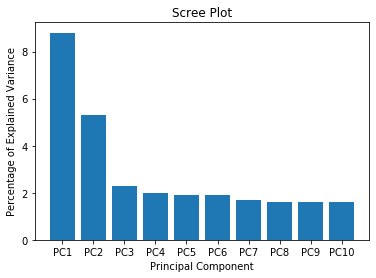

In [0]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [0]:
pca_data.shape

(330, 10)

In [0]:
pca_1 = pca_data[:,0:4]
# pca_1

In [0]:
pca_1.shape

(330, 2)

In [0]:
# target_tst = summarized_dataframes_wo_portfolio['ln_LR']

In [0]:
# pca_1_df = pd.DataFrame(pca_1)

In [0]:
from sklearn.linear_model import Ridge, RidgeCV, LassoCV

In [0]:
l2_cv = RidgeCV(alphas = np.linspace(0.1,1000,num=100), cv=None, store_cv_values=True)
l2_cv.fit(pca_1, target_tst)

RidgeCV(alphas=array([1.000e-01, 1.020e+01, 2.030e+01, 3.040e+01, 4.050e+01, 5.060e+01,
       6.070e+01, 7.080e+01, 8.090e+01, 9.100e+01, 1.011e+02, 1.112e+02,
       1.213e+02, 1.314e+02, 1.415e+02, 1.516e+02, 1.617e+02, 1.718e+02,
       1.819e+02, 1.920e+02, 2.021e+02, 2.122e+02, 2.223e+02, 2.324e+02,
       2.425e+02, 2.526e+02, 2.627e+02, 2.728e+02, 2.829e+02, 2.930e+02,
       3.031e+02, 3.132e+02, 3.233e+0...
       7.273e+02, 7.374e+02, 7.475e+02, 7.576e+02, 7.677e+02, 7.778e+02,
       7.879e+02, 7.980e+02, 8.081e+02, 8.182e+02, 8.283e+02, 8.384e+02,
       8.485e+02, 8.586e+02, 8.687e+02, 8.788e+02, 8.889e+02, 8.990e+02,
       9.091e+02, 9.192e+02, 9.293e+02, 9.394e+02, 9.495e+02, 9.596e+02,
       9.697e+02, 9.798e+02, 9.899e+02, 1.000e+03]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring=None, store_cv_values=True)

In [0]:
pred_train_l2=l2_cv.predict(pca_1)
mae_train_l2 = mean_absolute_error(target_tst, pred_train_l2)
# mae_train_l2 = np.sqrt(mse_train_l2)
print(mae_train_l2)

0.49471018898240066


In [0]:
l2_cv.cv_values_

array([[2.07699104e+00, 2.08166580e+00, 2.08632574e+00, ...,
        2.47048434e+00, 2.47399342e+00, 2.47749283e+00],
       [7.58131666e-01, 7.59211137e-01, 7.60291281e-01, ...,
        8.60510606e-01, 8.61507614e-01, 8.62503062e-01],
       [1.03820098e+00, 1.04020348e+00, 1.04219644e+00, ...,
        1.19766501e+00, 1.19902027e+00, 1.20037086e+00],
       ...,
       [1.04695381e-02, 1.10383600e-02, 1.16197776e-02, ...,
        1.05116972e-01, 1.06353371e-01, 1.07592711e-01],
       [7.87090270e-05, 3.74219015e-05, 1.13858058e-05, ...,
        4.57870209e-02, 4.66078120e-02, 4.74330362e-02],
       [1.09055293e-03, 1.24801485e-03, 1.41543229e-03, ...,
        4.90811156e-02, 4.98063783e-02, 5.05345392e-02]])

In [0]:
# l2_pred_mean = l2_cv.cv_values_.mean(axis=0)
# l2_pred_mae = min(np.sqrt(l2_pred_mean))
# print(l2_pred_rmse)

In [0]:
cv_values_sqrt = np.sqrt(l2_cv.cv_values_)

In [0]:
cv_values_sqrt

array([[1.44117696, 1.44279791, 1.4444119 , ..., 1.57177745, 1.57289333,
        1.57400535],
       [0.87070757, 0.87132723, 0.87194683, ..., 0.92763711, 0.92817434,
        0.92871043],
       [1.01892148, 1.01990366, 1.02088023, ..., 1.09437882, 1.09499784,
        1.09561437],
       ...,
       [0.10232076, 0.1050636 , 0.10779507, ..., 0.32421748, 0.32611865,
        0.32801328],
       [0.00887181, 0.00611734, 0.00337429, ..., 0.21397902, 0.21588842,
        0.21779127],
       [0.03302352, 0.03532725, 0.03762223, ..., 0.22154258, 0.22317343,
        0.22479889]])

In [0]:
l2_pred_mean = cv_values_sqrt.mean(axis=0)
l2_pred_mae = min(l2_pred_mean)
print(l2_pred_mae)

0.5008994790251549


In [0]:
#2nd Part

In [0]:
# summarized_dataframes_wo_portfolio_Yllow = summarized_dataframes_wo_portfolio_org.drop(['Vehicle_Days_Per_Week_Driven_-1','Vehicle_Days_Per_Week_Driven_0','Vehicle_Days_Per_Week_Driven_1','Vehicle_Days_Per_Week_Driven_2','Vehicle_Days_Per_Week_Driven_3','Vehicle_Days_Per_Week_Driven_4','Vehicle_Days_Per_Week_Driven_5','Vehicle_Days_Per_Week_Driven_6','Vehicle_Days_Per_Week_Driven_7','Vehicle_Annual_Miles','Driver_Total','Driver_Total_Male','Driver_Total_Female','Driver_Total_Single','Driver_Total_Married','Driver_Total_Related_To_Insured_Self','Driver_Total_Related_To_Insured_Spouse','Driver_Total_Related_To_Insured_Child','Driver_Total_Licensed_In_State','EEA_Policy_Zip_Code_3_423.0','EEA_Policy_Zip_Code_3_424.0','EEA_Policy_Zip_Code_3_425.0','EEA_Policy_Zip_Code_3_427.0','EEA_Policy_Zip_Code_3_428.0','EEA_Policy_Zip_Code_3_429.0','EEA_Policy_Zip_Code_3_430.0','EEA_Policy_Zip_Code_3_431.0','EEA_Policy_Zip_Code_3_432.0','EEA_Policy_Zip_Code_3_433.0','EEA_Policy_Zip_Code_3_436.0','EEA_Policy_Zip_Code_3_437.0','EEA_Policy_Zip_Code_3_438.0','EEA_Policy_Zip_Code_3_441.0','EEA_Policy_Zip_Code_3_442.0','EEA_Policy_Zip_Code_3_521.0','EEA_Policy_Zip_Code_3_522.0','EEA_Policy_Zip_Code_first_two_42','EEA_Policy_Zip_Code_first_two_43','EEA_Policy_Zip_Code_first_two_44','EEA_Policy_Zip_Code_first_two_52','EEA_Policy_Zip_Code_first_1','EEA_Policy_Zip_Code_first_2','EEA_Policy_Zip_Code_first_3','EEA_Policy_Zip_Code_first_4','EEA_Policy_Zip_Code_first_5','EEA_Policy_Zip_Code_first_6','EEA_Policy_Zip_Code_first_7','EEA_Policy_Zip_Code_first_8','EEA_Policy_Zip_Code_first_9'], axis=1)

# scaled_data_yllow = preprocessing.scale(summarized_dataframes_wo_portfolio_Yllow)

# pca = PCA(n_components=10)
# pca.fit(scaled_data_yllow)
# pca_data_yllow = pca.transform(scaled_data_yllow)

# per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
# labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

# plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
# plt.ylabel('Percentage of Explained Variance')
# plt.xlabel('Principal Component')
# plt.title('Scree Plot')
# plt.show()

pca_2 = pca_data_yllow[:,0:3]

l2_cv = RidgeCV(alphas = np.linspace(0.1,1000,num=100), cv=None, store_cv_values=True)
l2_cv.fit(pca_2, target_tst)

pred_train_l2=l2_cv.predict(pca_2)
mae_train_l2 = mean_absolute_error(target_tst, pred_train_l2)
print(mae_train_l2)

cv_values_sqrt = np.sqrt(l2_cv.cv_values_)

l2_pred_mean = cv_values_sqrt.mean(axis=0)
l2_pred_mae = min(l2_pred_mean)
print(l2_pred_mae)

0.4961968374238152
0.5013243580335414


In [0]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
linear_mod = reg.fit(pca_2, target_tst)

pred_train_lin=linear_mod.predict(pca_2)
mae_train_l2 = mean_absolute_error(target_tst, pred_train_lin)
print(mae_train_l2)

0.49500426403773584


In [0]:
# summarized_dataframes_wo_portfolio_Yllow.shape

(330, 223)

In [0]:
# summarized_dataframes_wo_portfolio_Blue = summarized_dataframes_wo_portfolio_Yllow.drop(['Vehicle_Make_Description 1_ACURA','Vehicle_Make_Description 1_AUDI','Vehicle_Make_Description 1_BMW','Vehicle_Make_Description 1_BUIK','Vehicle_Make_Description 1_CADILLAC','Vehicle_Make_Description 1_CHEV','Vehicle_Make_Description 1_CHRY','Vehicle_Make_Description 1_DAEW','Vehicle_Make_Description 1_DODGE','Vehicle_Make_Description 1_EAGLE','Vehicle_Make_Description 1_FORD','Vehicle_Make_Description 1_GMC','Vehicle_Make_Description 1_HOND','Vehicle_Make_Description 1_HUMM','Vehicle_Make_Description 1_HYUNDAI','Vehicle_Make_Description 1_INFI','Vehicle_Make_Description 1_ISUZU','Vehicle_Make_Description 1_JAG','Vehicle_Make_Description 1_JEEP','Vehicle_Make_Description 1_KIA','Vehicle_Make_Description 1_LEXUS','Vehicle_Make_Description 1_LINCOLN','Vehicle_Make_Description 1_MAZDA','Vehicle_Make_Description 1_MERC','Vehicle_Make_Description 1_MITS','Vehicle_Make_Description 1_NISSAN','Vehicle_Make_Description 1_OLDS','Vehicle_Make_Description 1_PLYM','Vehicle_Make_Description 1_PONTIAC','Vehicle_Make_Description 1_PORSCHE','Vehicle_Make_Description 1_ROVR','Vehicle_Make_Description 1_SAAB','Vehicle_Make_Description 1_SATURN','Vehicle_Make_Description 1_SCIO','Vehicle_Make_Description 1_SUBARU','Vehicle_Make_Description 1_SUZUKI','Vehicle_Make_Description 1_TOYOTA','Vehicle_Make_Description 1_VOLKSWAGON','Vehicle_Make_Description 1_VOLVO'], axis=1)

# scaled_data_Blue = preprocessing.scale(summarized_dataframes_wo_portfolio_Blue)

# pca = PCA(n_components=10)
# pca.fit(scaled_data_Blue)
# pca_data_Blue = pca.transform(scaled_data_Blue)

# per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
# labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

# plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
# plt.ylabel('Percentage of Explained Variance')
# plt.xlabel('Principal Component')
# plt.title('Scree Plot')
# plt.show()

pca_3 = pca_data_Blue[:,0:3]

l2_cv = RidgeCV(alphas = np.linspace(0.1,1000,num=100), cv=None, store_cv_values=True)
l2_cv.fit(pca_3, target_tst)

pred_train_l2=l2_cv.predict(pca_3)
mae_train_l2 = mean_absolute_error(target_tst, pred_train_l2)
print(mae_train_l2)

cv_values_sqrt = np.sqrt(l2_cv.cv_values_)

l2_pred_mean = cv_values_sqrt.mean(axis=0)
l2_pred_mae = min(l2_pred_mean)
print(l2_pred_mae)

0.495746420341716
0.500913610502737


~Starting from original summarized dataset.

Import required libraries.

In [0]:
from sklearn import linear_model
from sklearn.linear_model import Ridge, RidgeCV, LassoCV
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd


In [0]:
summarized_dataframes = pd.read_csv('summarized_dataframes (1).csv')

Drop column 'Portfolio'.

In [0]:
 summarized_dataframes_wo_portfolio = summarized_dataframes.drop(['Portfolio'], axis = 1)

Drop all the desired variables.

In [0]:
summarized_dataframes_wo_portfolio_All = summarized_dataframes_wo_portfolio.drop(['Policy_Company_Standard ','Policy_Installment_Term_6','Policy_Billing_Code_Direct Billed to Insured','Policy_Method_Of_Payment_Pre-paid','Policy_Reinstatement_Fee_Indicator_N','Vehicle_Passive_Restraint_N','Vehicle_Med_Pay_Limit_-1','Vehicle_Bodily_Injury_Limit_25-100_new','Vehicle_Bodily_Injury_Limit_100-500_new','Vehicle_Physical_Damage_Limit_-1','Vehicle_Comprehensive_Coverage_Indicator_N','Vehicle_Collision_Coverage_Indicator_N','Vehicle_Collision_Coverage_Deductible_-1','Vehicle_Youthful_Driver_Indicator_N','Vehicle_Youthful_Driver_Training_Code_Not Applicable                 ','Vehicle_Youthful_Good_Student_Code_Not Eligible for Good Student Credit','Vehicle_Safe_Driver_Discount_Indicator_Y','EEA_Liability_Coverage_Only_Indicator_Y','EEA_Multi_Auto_Policies_Indicator_Y','EEA_Packaged_Policy_Indicator_N','EEA_Full_Coverage_Indicator_N','SYS_Renewed_Y','SYS_New_Business_N','Claim_Count','Loss_Amount','Vehicle_Make_Age_Median','Driver_Minimum_Age_Median','Driver_Maximum_Age_Median','Loss_Ratio', 'Vehicle_Days_Per_Week_Driven_-1','Vehicle_Days_Per_Week_Driven_0','Vehicle_Days_Per_Week_Driven_1','Vehicle_Days_Per_Week_Driven_2','Vehicle_Days_Per_Week_Driven_3','Vehicle_Days_Per_Week_Driven_4','Vehicle_Days_Per_Week_Driven_5','Vehicle_Days_Per_Week_Driven_6','Vehicle_Days_Per_Week_Driven_7','Vehicle_Annual_Miles','Driver_Total','Driver_Total_Male','Driver_Total_Female','Driver_Total_Single','Driver_Total_Married','Driver_Total_Related_To_Insured_Self','Driver_Total_Related_To_Insured_Spouse','Driver_Total_Related_To_Insured_Child','Driver_Total_Licensed_In_State','EEA_Policy_Zip_Code_3_423.0','EEA_Policy_Zip_Code_3_424.0','EEA_Policy_Zip_Code_3_425.0','EEA_Policy_Zip_Code_3_427.0','EEA_Policy_Zip_Code_3_428.0','EEA_Policy_Zip_Code_3_429.0','EEA_Policy_Zip_Code_3_430.0','EEA_Policy_Zip_Code_3_431.0','EEA_Policy_Zip_Code_3_432.0','EEA_Policy_Zip_Code_3_433.0','EEA_Policy_Zip_Code_3_436.0','EEA_Policy_Zip_Code_3_437.0','EEA_Policy_Zip_Code_3_438.0','EEA_Policy_Zip_Code_3_441.0','EEA_Policy_Zip_Code_3_442.0','EEA_Policy_Zip_Code_3_521.0','EEA_Policy_Zip_Code_3_522.0','EEA_Policy_Zip_Code_first_two_42','EEA_Policy_Zip_Code_first_two_43','EEA_Policy_Zip_Code_first_two_44','EEA_Policy_Zip_Code_first_two_52','EEA_Policy_Zip_Code_first_1','EEA_Policy_Zip_Code_first_2','EEA_Policy_Zip_Code_first_3','EEA_Policy_Zip_Code_first_4','EEA_Policy_Zip_Code_first_5','EEA_Policy_Zip_Code_first_6','EEA_Policy_Zip_Code_first_7','EEA_Policy_Zip_Code_first_8','EEA_Policy_Zip_Code_first_9','EEA_Policy_Zip_Code_3_426.0','EEA_Policy_Zip_Code_3_434.0','EEA_Policy_Zip_Code_3_435.0','EEA_Policy_Zip_Code_3_439.0','EEA_Policy_Zip_Code_3_440.0’,'Vehicle_Make_Description 1_ACURA','Vehicle_Make_Description 1_AUDI','Vehicle_Make_Description 1_BMW','Vehicle_Make_Description 1_BUIK','Vehicle_Make_Description 1_CADILLAC','Vehicle_Make_Description 1_CHEV','Vehicle_Make_Description 1_CHRY','Vehicle_Make_Description 1_DAEW','Vehicle_Make_Description 1_DODGE','Vehicle_Make_Description 1_EAGLE','Vehicle_Make_Description 1_FORD','Vehicle_Make_Description 1_GMC','Vehicle_Make_Description 1_HOND','Vehicle_Make_Description 1_HUMM','Vehicle_Make_Description 1_HYUNDAI','Vehicle_Make_Description 1_INFI','Vehicle_Make_Description 1_ISUZU','Vehicle_Make_Description 1_JAG','Vehicle_Make_Description 1_JEEP','Vehicle_Make_Description 1_KIA','Vehicle_Make_Description 1_LEXUS','Vehicle_Make_Description 1_LINCOLN','Vehicle_Make_Description 1_MAZDA','Vehicle_Make_Description 1_MERC','Vehicle_Make_Description 1_MITS','Vehicle_Make_Description 1_NISSAN','Vehicle_Make_Description 1_OLDS','Vehicle_Make_Description 1_PLYM','Vehicle_Make_Description 1_PONTIAC','Vehicle_Make_Description 1_PORSCHE','Vehicle_Make_Description 1_ROVR','Vehicle_Make_Description 1_SAAB','Vehicle_Make_Description 1_SATURN','Vehicle_Make_Description 1_SCIO','Vehicle_Make_Description 1_SUBARU','Vehicle_Make_Description 1_SUZUKI','Vehicle_Make_Description 1_TOYOTA','Vehicle_Make_Description 1_VOLKSWAGON','Vehicle_Make_Description 1_VOLVO'], axis=1)

Separate out target and remaining data.

In [0]:
target_tst = summarized_dataframes_wo_portfolio['ln_LR']
summarized_dataframes_wo_portfolio_org = summarized_dataframes_wo_portfolio_All.drop(['ln_LR'], axis=1)

Scale the independent variables (remaining data).

In [0]:
scale =StandardScaler()
scaled_data = scale.fit_transform(summarized_dataframes_wo_portfolio_org)

Linear Model without CV

In [0]:
reg = linear_model.LinearRegression()
linear_mod = reg.fit(scaled_data, target_tst)

pred_train_lin=linear_mod.predict(scaled_data)
mae_train_lin = mean_absolute_error(target_tst, pred_train_lin)
print("Predicted MAE from Linear model without regularization = ", mae_train_lin)

Apply CV without PCA

L2 Reg

In [0]:
l2_cv = RidgeCV(alphas = np.linspace(0.1,1000,num=100), cv=None, store_cv_values=True)
l2_cv.fit(scaled_data, target_tst)
pred_train_l2=l2_cv.predict(scaled_data)
mae_train_l2 = mean_absolute_error(target_tst, pred_train_l2)
print("Predicted MAE on training data = ", mae_train_l2)

Expected MAE for L2

In [0]:
cv_values_sqrt = np.sqrt(l2_cv.cv_values_)

l2_pred_mean = cv_values_sqrt.mean(axis=0)
l2_pred_mae = min(l2_pred_mean)
print(l2_pred_mae)

L1 Reg

In [0]:
l1_cv = RidgeCV(alphas = np.linspace(0.1,1000,num=100), cv=scaled_data.shape[0], store_cv_values=True)
l1_cv.fit(scaled_data, target_tst)
pred_train_l1=l1_cv.predict(scaled_data)
mae_train_l1 = mean_absolute_error(target_tst, pred_train_l2)
print("Predicted MAE on training data = ",mae_train_l1)

Expected MAE for L1

In [0]:
cv_values_sqrt = np.sqrt(l1_cv.cv_values_)

l1_pred_mean = cv_values_sqrt.mean(axis=0)
l1_pred_mae = min(l1_pred_mean)
print(l1_pred_mae)

With PCA

In [0]:
pca = PCA(n_components=10)
pca.fit(scaled_data)


In [0]:
pca_data = pca.transform(scaled_data)

Visualization

In [0]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

Apply with regularization

In [0]:
pca_3 = pca_data[:,0:3]

l2_cv = RidgeCV(alphas = np.linspace(0.1,1000,num=100), cv=None, store_cv_values=True)
l2_cv.fit(pca_3, target_tst)

pred_train_l2=l2_cv.predict(pca_3)
mae_train_l2 = mean_absolute_error(target_tst, pred_train_l2)
print(mae_train_l2)

Expected MAE for PCA with reg

In [0]:
cv_values_sqrt = np.sqrt(l2_cv.cv_values_)

l2_pred_mean = cv_values_sqrt.mean(axis=0)
l2_pred_mae = min(l2_pred_mean)
print(l2_pred_mae)